## Group 6 - Math for AI, AI23 @ HCMUS
- 23122013 - Đinh Đức Tài
- 23122002 - Nguyễn Đình Hà Dương
- 23122004 - Nguyễn Lê Hoàng Trung
- 23122014 - Hoàng Minh Trung

## [Lab1] Linear Regression

## Part 0: Import libs, define DataProcessor and functions

#### 0.1: Import libs: Numpy, Pandas, Matplotlib

In [6]:
# Importing the libraries: numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

#### 0.2: Create class DataProcessor

In [7]:
class DataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.original = True

    def load_data(self):
        """Load data from the CSV file."""
        self.data = pd.read_csv(self.file_path)
        print("Data loaded successfully!")
        return self.data

    def get_summary(self):
        """Print a summary of the data."""
        print("Number of rows:", len(self.data))
        print("Column names:", self.data.columns.tolist())
        return self.data.describe()

    def head(self, n = 5):
        """Return the first n rows of the data."""
        return self.data.head(n)

    def null_info(self):
        """Print information about missing values."""
        print("\nNumber of rows with NaN values:", self.data.isna().any(axis=1).sum())

    def get_column_initial_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi",
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó",
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)",
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)",
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi",
                "Dung tích bình nhiên liệu (lít)"
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

    def get_column_after_transform_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi",
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó",
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)",
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)",
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi",
                "Dung tích bình nhiên liệu (lít)", 'Vòng tua tại Công suất tối đa (rpm)',
                'Vòng tua tại Mô-men xoắn tối đa (rpm)',
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

#### 0.3: Get infomation about unique values functions

In [8]:
def get_some_unique_values(self):
    print("\nUnique values of some columns:")
    print("Fuel Type:", self.data['Fuel Type'].unique())
    print("Transmission:", self.data['Transmission'].unique())
    print("Seller Type:", self.data['Seller Type'].unique())
    print("Drivetrain:", self.data['Drivetrain'].unique())

    print("Owner:", self.data['Owner'].unique())
    print("Seating Capacity:", self.data['Seating Capacity'].unique())

def unique_values(self):
    object_columns = self.data.select_dtypes(include=['object']).columns
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns

    # List of object columns and their unique values
    object_columns_list = [(col, self.data[col].nunique()) for col in object_columns]

    # List of numeric columns and their unique values
    numeric_columns_list = [(col, self.data[col].nunique()) for col in numeric_columns]

    print("Object Columns and number of unique values: {}".format(len(object_columns_list)))
    print(object_columns_list)

    print("\nNumeric Columns and number of unique values: {}".format(len(numeric_columns_list)))
    print(numeric_columns_list)
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns
    return numeric_columns, object_columns

DataProcessor.get_some_unique_values = get_some_unique_values
DataProcessor.unique_values = unique_values

#### 0.4: Clean and transform data functions

In [9]:
def clean_data(self):
    """Clean the data by handling missing values and duplicates."""
    # Handle missing values
    # Fill numeric columns with their mean
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean().astype(int))

    # Fill categorical columns with the most frequent value
    categorical_columns = self.data.select_dtypes(include=['object']).columns
    self.data[categorical_columns] = self.data[categorical_columns].fillna(self.data[categorical_columns].mode().iloc[0])

    # Remove duplicates
    self.data = self.data.drop_duplicates()

    # Reset index after cleaning
    self.data.reset_index(drop=True, inplace=True)

    # Print summary after cleaning
    print("Data cleaned successfully!")
    print("Number of rows after cleaning:", len(self.data))
    print("Number of missing values after cleaning:", self.data.isna().sum().sum())

def transform_data(self):
    """Transform data by standardizing specific columns."""
    # 'Engine' ('cc') -> float
    self.data['Engine'] = self.data['Engine'].astype(str).str.replace(' cc', '').astype(float)

    # Extract RPM values from the original string values before conversion
    if (self.original is True):
        self.data['rpm at Max Power'] = (
            self.data['Max Power']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
        self.data['rpm at Max Torque'] = (
            self.data['Max Torque']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
    self.original = False

    # Fill missing values with the most frequent value
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].fillna(self.data['rpm at Max Power'].mode().iloc[0])
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].fillna(self.data['rpm at Max Torque'].mode().iloc[0])

    # 'rpm at Max Power' -> int
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].astype(int)

    # 'rpm at Max Torque' -> int
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].astype(int)

    # 'Max Power' ('bhp') -> int
    self.data['Max Power'] = self.data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Max Torque' ('Nm') -> int
    self.data['Max Torque'] = self.data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Seating Capacity' -> int
    self.data['Seating Capacity'] = self.data['Seating Capacity'].astype(int)

    # 'Fuel Tank Capacity' -> int
    self.data['Fuel Tank Capacity'] = self.data['Fuel Tank Capacity'].astype(int)

    # 'Owner' -> int
    self.data['Owner'] = self.data['Owner'].map({
        'UnRegistered Car': 0,
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth': 4,
        '4 or More': 5,
        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
    })

    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

    print("Data transformed successfully!")
    print("\nData Transformation Details:")
    print("- 'Engine' (cc) converted to float.")
    print("- 'Max Power' (bhp) converted to integer.")
    print("- 'Max Torque' (Nm) converted to integer.")
    print("- Add 'rpm at Max Power' and converted to integer.")
    print("- Add 'rpm at Max Torque' and converted to integer.")
    print("- 'Seating Capacity' converted to integer.")
    print("- 'Fuel Tank Capacity' converted to integer.")
    print("- 'Owner' converted to numerical categories.")

DataProcessor.clean_data = clean_data
DataProcessor.transform_data = transform_data

#### 0.5: Data visualization functions

In [10]:
def plot_corr_matrix(self, width=12, height=8):
    # Compute the correlation matrix using only numeric features
    corr_matrix = self.data[self.numeric_columns].corr()

    # Plot the correlation matrix using matplotlib
    plt.figure(figsize=(width, height))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Correlation Matrix of Numeric Features")

    # Annotate the matrix with correlation coefficients
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_distribution_of_numeric_columns(self):
    # Plot histograms for all numeric columns
    num_cols = self.numeric_columns

    num_cols_count = len(num_cols)
    n_cols = 3  # Number of columns in the figure
    n_rows = (num_cols_count + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3.5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(num_cols):
        axes[i].hist(self.data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def box_plot_for_object_columns(self):
    for col in self.object_columns:
        if (col == 'Model'):
            continue
        plt.figure(figsize=(12, 3))
        categories = self.data[col].unique()
        groups = [self.data.loc[self.data[col] == category, 'Price'] for category in categories]
        plt.boxplot(groups, patch_artist=True, tick_labels=categories)
        plt.title(f'Box Plot: Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        if (col == 'Location'):
            plt.xticks(rotation=90)
        elif (col == 'Fuel Type' or col == 'Transmission' or col == 'Seller Type' or col == 'Drivetrain'):
            plt.xticks(rotation=0)
        else:
            plt.xticks(rotation=60)
        plt.show()

def scatter_plot_for_numeric_columns(self):
    cols = [col for col in self.numeric_columns if col != 'Price']
    n_plots = len(cols)
    n_cols = 3
    n_rows = int(n_plots / n_cols) + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        axes[i].scatter(self.data[col], self.data['Price'], alpha=0.5, color='blue', edgecolors='k')
        axes[i].set_title(f'Relationship between Price and {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

DataProcessor.plot_corr_matrix = plot_corr_matrix
DataProcessor.plot_distribution_of_numeric_columns = plot_distribution_of_numeric_columns
DataProcessor.box_plot_for_object_columns = box_plot_for_object_columns
DataProcessor.scatter_plot_for_numeric_columns = scatter_plot_for_numeric_columns

#### 0.6: Split dataset to train set and validation set

In [11]:
def train_valid_split(self, valid_size=0.2, random_state=None):
    """Split the data into training and validation sets."""
    train_set = copy.deepcopy(self)
    valid_set = copy.deepcopy(self)
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle indices and compute the split index
    indices = np.arange(len(self.data))
    np.random.shuffle(indices)
    split_idx = int((1 - valid_size) * len(self.data))

    # Split the data into training and validation sets
    train_indices = indices[:split_idx]
    valid_indices = indices[split_idx:]
    train_set.data = self.data.iloc[train_indices].reset_index(drop=True)
    valid_set.data = self.data.iloc[valid_indices].reset_index(drop=True)

    return train_set, valid_set

DataProcessor.train_valid_split = train_valid_split

#### 0.7: Data Encoding

In [12]:
def encode_data(self):
    """
    Mã hóa các biến theo yêu cầu:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make
    make_median = self.data.groupby('Make')['Price'].median()
    self.data['Make'] = self.data['Make'].map(make_median)

    # Mẫu xe: map giá trung vị theo Model
    model_median = self.data.groupby('Model')['Price'].median()
    self.data['Model'] = self.data['Model'].map(model_median)

    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)

    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)

    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = self.data['Price'].median()
    location_medians = self.data.groupby('Location')['Price'].median()
    def encode_location(loc):
        return 1 if location_medians.loc[loc] >= global_median_price else 0
    self.data['Location'] = self.data['Location'].apply(encode_location)

    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)

    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)

    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = {'FWD': 1, 'RWD': 2, 'AWD': 3}
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)

    print("Data encoding completed!")

# Gắn hàm encode_data vào class DataProcessor
DataProcessor.encode_data = encode_data

#### 0.8: Data Normalization

In [13]:
def normalize_data(self):
    """
    Chuẩn hóa các feature dữ liệu:
    - Áp dụng log transformation cho 'Price' và 'Year' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """

    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Price Norm'] = np.log1p(self.data['Price'])
    self.data['Year'] = np.log1p(self.data['Year'])

    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price', 'Price Norm'])

    min_vals = self.data[numeric_cols].min()
    max_vals = self.data[numeric_cols].max()
    range_vals = max_vals - min_vals
    # Avoid division by zero by replacing 0 differences with 1
    range_vals[range_vals == 0] = 1
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals

    self.unique_values()
    print("Data normalization completed!")

DataProcessor.normalize_data = normalize_data

## Part I: Load and Explore data (train.csv)
In this part, we will load and explore some information about the original data.

In [14]:
# Initialize the DataProcessor class and load the data (train.csv)
file_path = './data/train.csv'
data = DataProcessor(file_path)
data.load_data()

# Print summary of the data
print("\nSummary of the data:")
data.get_summary()

# First 5 rows of data
print("\nFirst 5 rows of data:")
data.head()

Data loaded successfully!

Summary of the data:
Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [15]:
# Print information about the null values
data.null_info()

# Print information about the columns
data.get_column_initial_info()


Number of rows with NaN values: 149

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,object,0,6,First


In [16]:
# Print the unique values of some columns
data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: [nan 'RWD' 'FWD' 'AWD']
Owner: ['Second' 'First' 'Third' 'UnRegistered Car' '4 or More' 'Fourth']
Seating Capacity: [nan  5.  7.  2.  6.  8.  4.]


## Part II: Data Preprocessing
In this part, we will fill NaN values and perform some data transformation.

#### II.1: Data cleaning

In [17]:
# Clean the data and fill missing values
data.clean_data()

Data cleaned successfully!
Number of rows after cleaning: 1647
Number of missing values after cleaning: 0


#### II.2: Data Transformation

In [18]:
# Transform the data
data.transform_data()

Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.


#### II.3: Explore data after preprocessing

In [19]:
data.get_column_after_transform_info()


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1


In [20]:
data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: ['FWD' 'RWD' 'AWD']
Owner: [2 1 3 0 5 4]
Seating Capacity: [5 7 2 6 8 4]


In [21]:
# Print number of unique values for each column
numeric_columns, object_columns = data.unique_values()
data_after_preprocessing = copy.deepcopy(data)
data_after_preprocessing.data

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 912), ('Fuel Type', 8), ('Transmission', 2), ('Location', 76), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 564), ('Year', 21), ('Kilometer', 701), ('Owner', 6), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,2,...,89,200,FWD,4281.0,1767.0,1592.0,5,52,4000,1750
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,1,...,184,350,RWD,4454.0,2044.0,1545.0,5,63,4000,1750
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,1,...,138,320,FWD,4585.0,1890.0,1785.0,7,70,3750,1600
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,1,...,326,700,AWD,5207.0,2157.0,1823.0,7,90,3600,1200
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,1,...,174,450,RWD,4795.0,1855.0,1835.0,7,80,3400,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Maruti Suzuki,Ciaz ZDi (O) [2014-2015],635000,2016,92000,Diesel,Manual,Mohali,White,2,...,89,200,FWD,4490.0,1730.0,1485.0,5,43,4000,1750
1643,Honda,Civic 1.8V MT,777000,2014,9212,Petrol,Manual,Patna,Grey,1,...,89,200,FWD,4281.0,1767.0,1592.0,5,52,4000,1750
1644,Maruti Suzuki,Alto VXi [2014-2019],369000,2017,16800,Petrol,Manual,Mumbai,Grey,1,...,67,90,FWD,3545.0,1490.0,1475.0,5,35,6000,3500
1645,BMW,5-Series 525d Luxury Plus,2280000,2014,68000,Diesel,Automatic,Pune,Blue,1,...,217,450,RWD,4899.0,2094.0,1464.0,5,52,4400,1500


## Part III: Data visualization

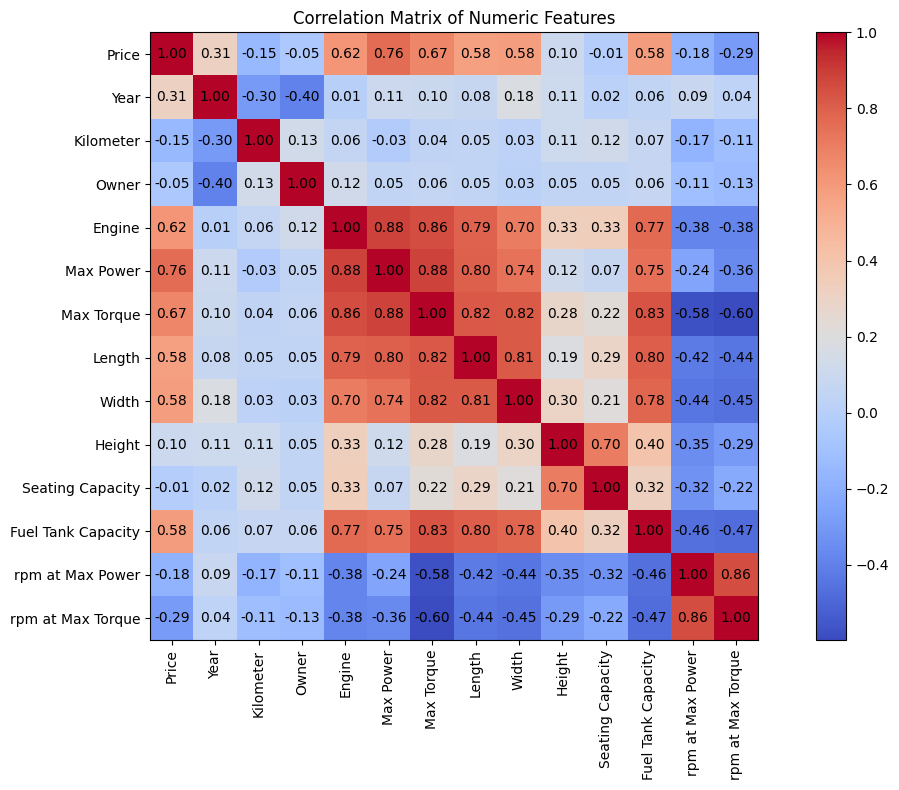

In [22]:
# 1. Plot the correlation matrix
data.plot_corr_matrix()

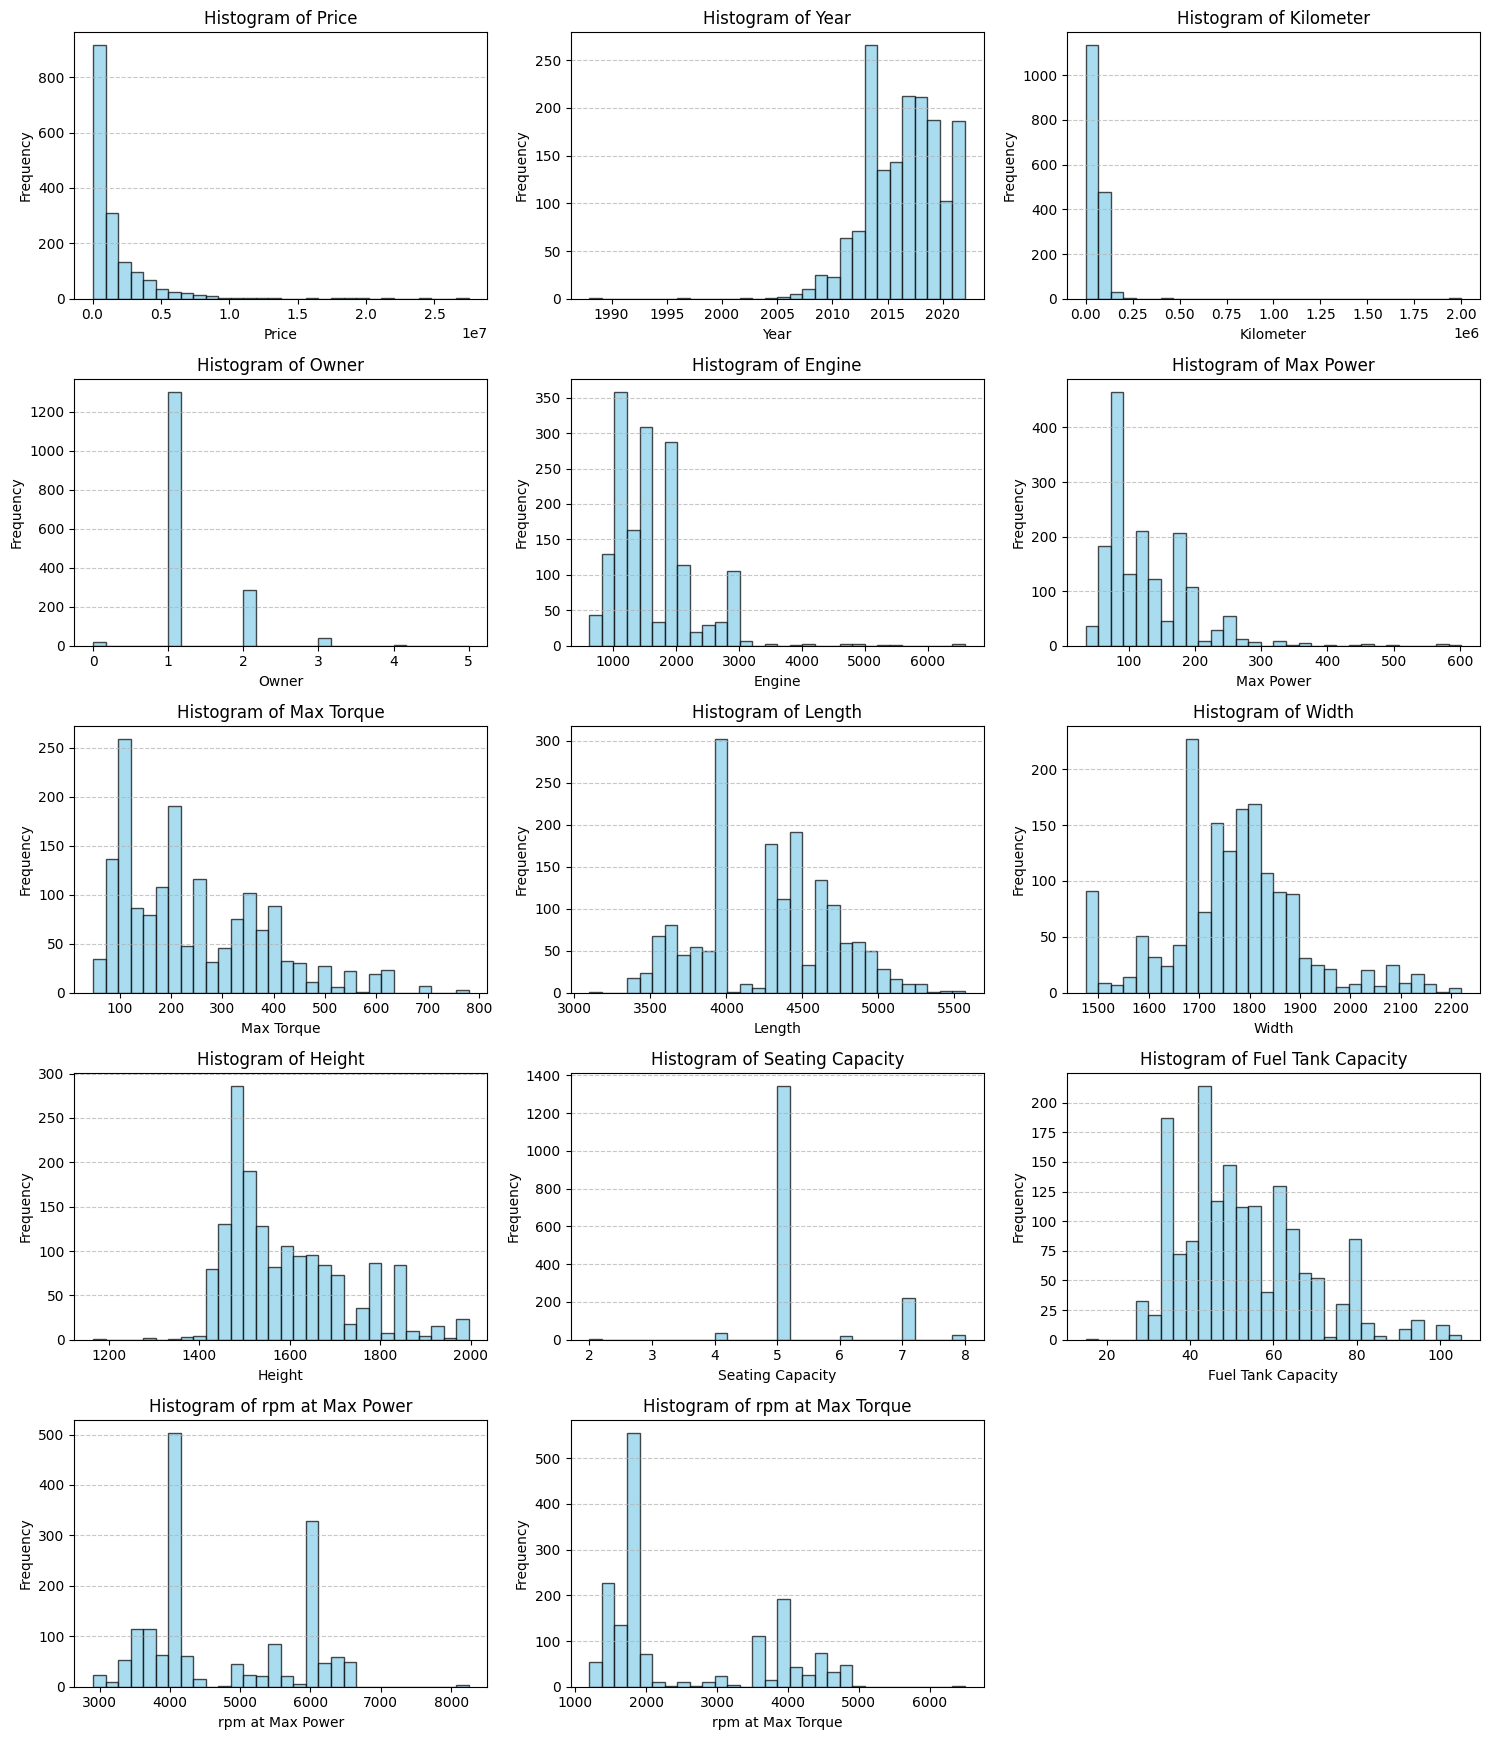

In [23]:
# 2. Plot the distribution of numeric columns
data.plot_distribution_of_numeric_columns()

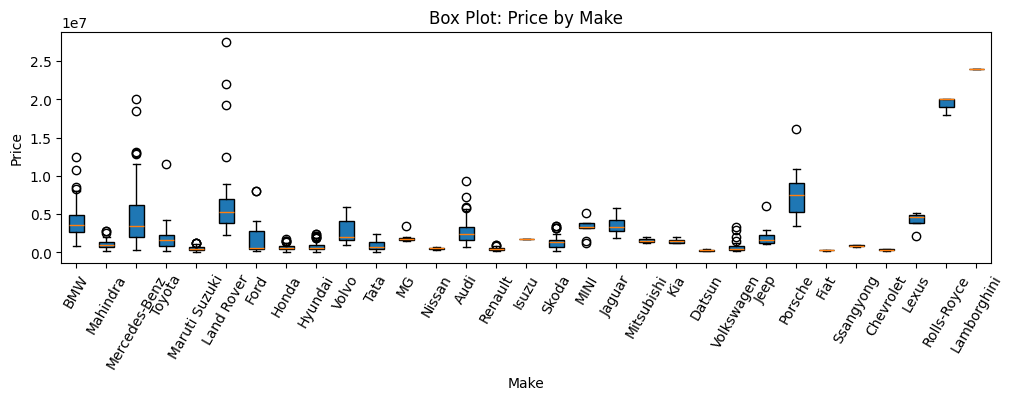

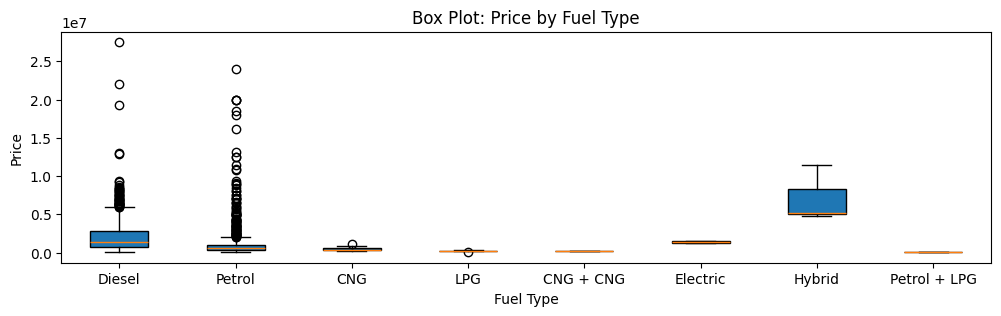

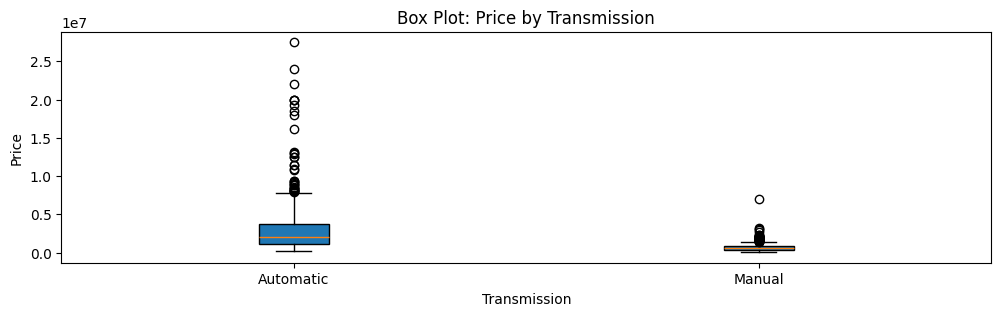

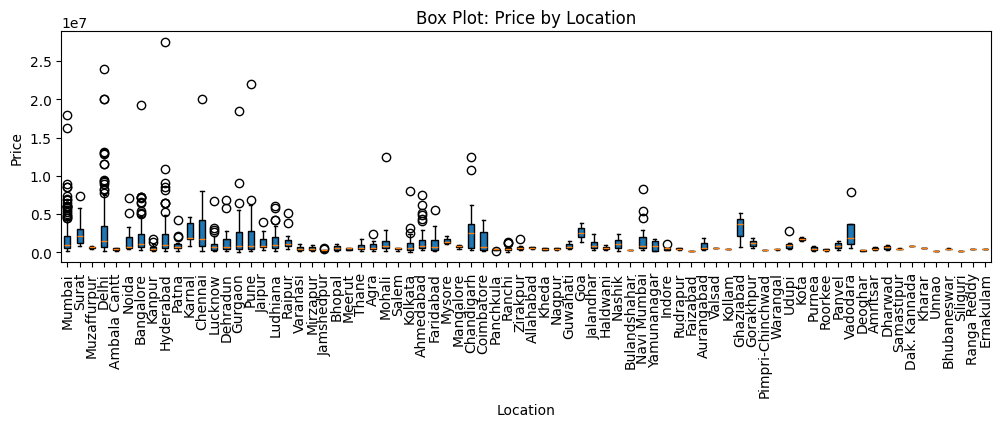

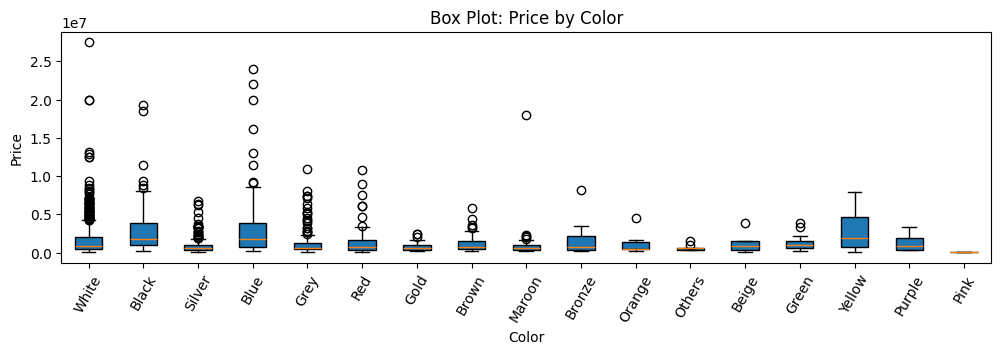

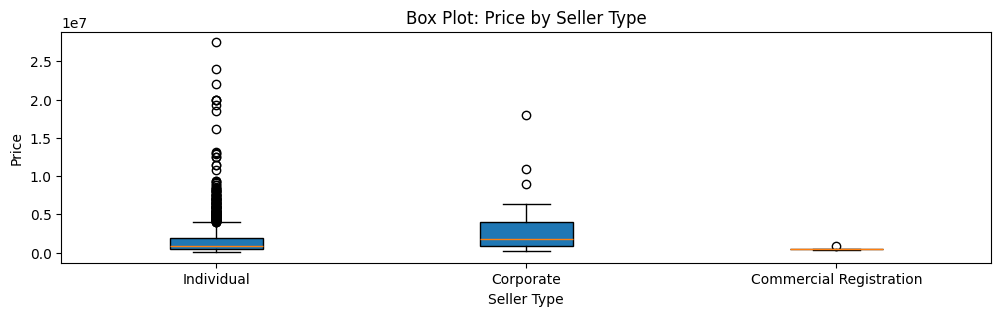

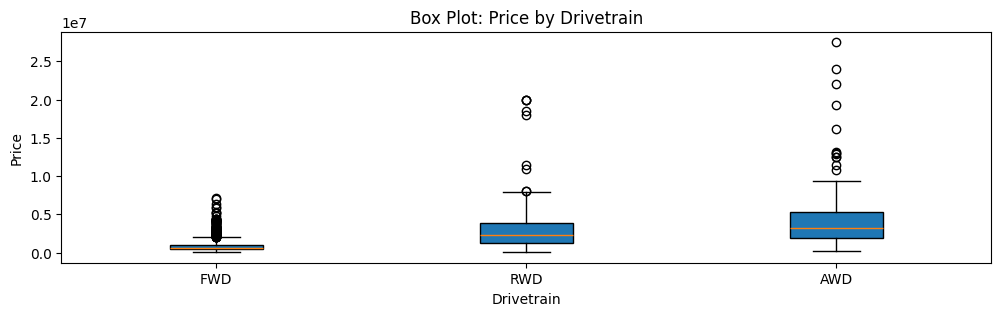

In [24]:
# 3. Box plot: Relationship between Price and Object Columns
data.box_plot_for_object_columns()

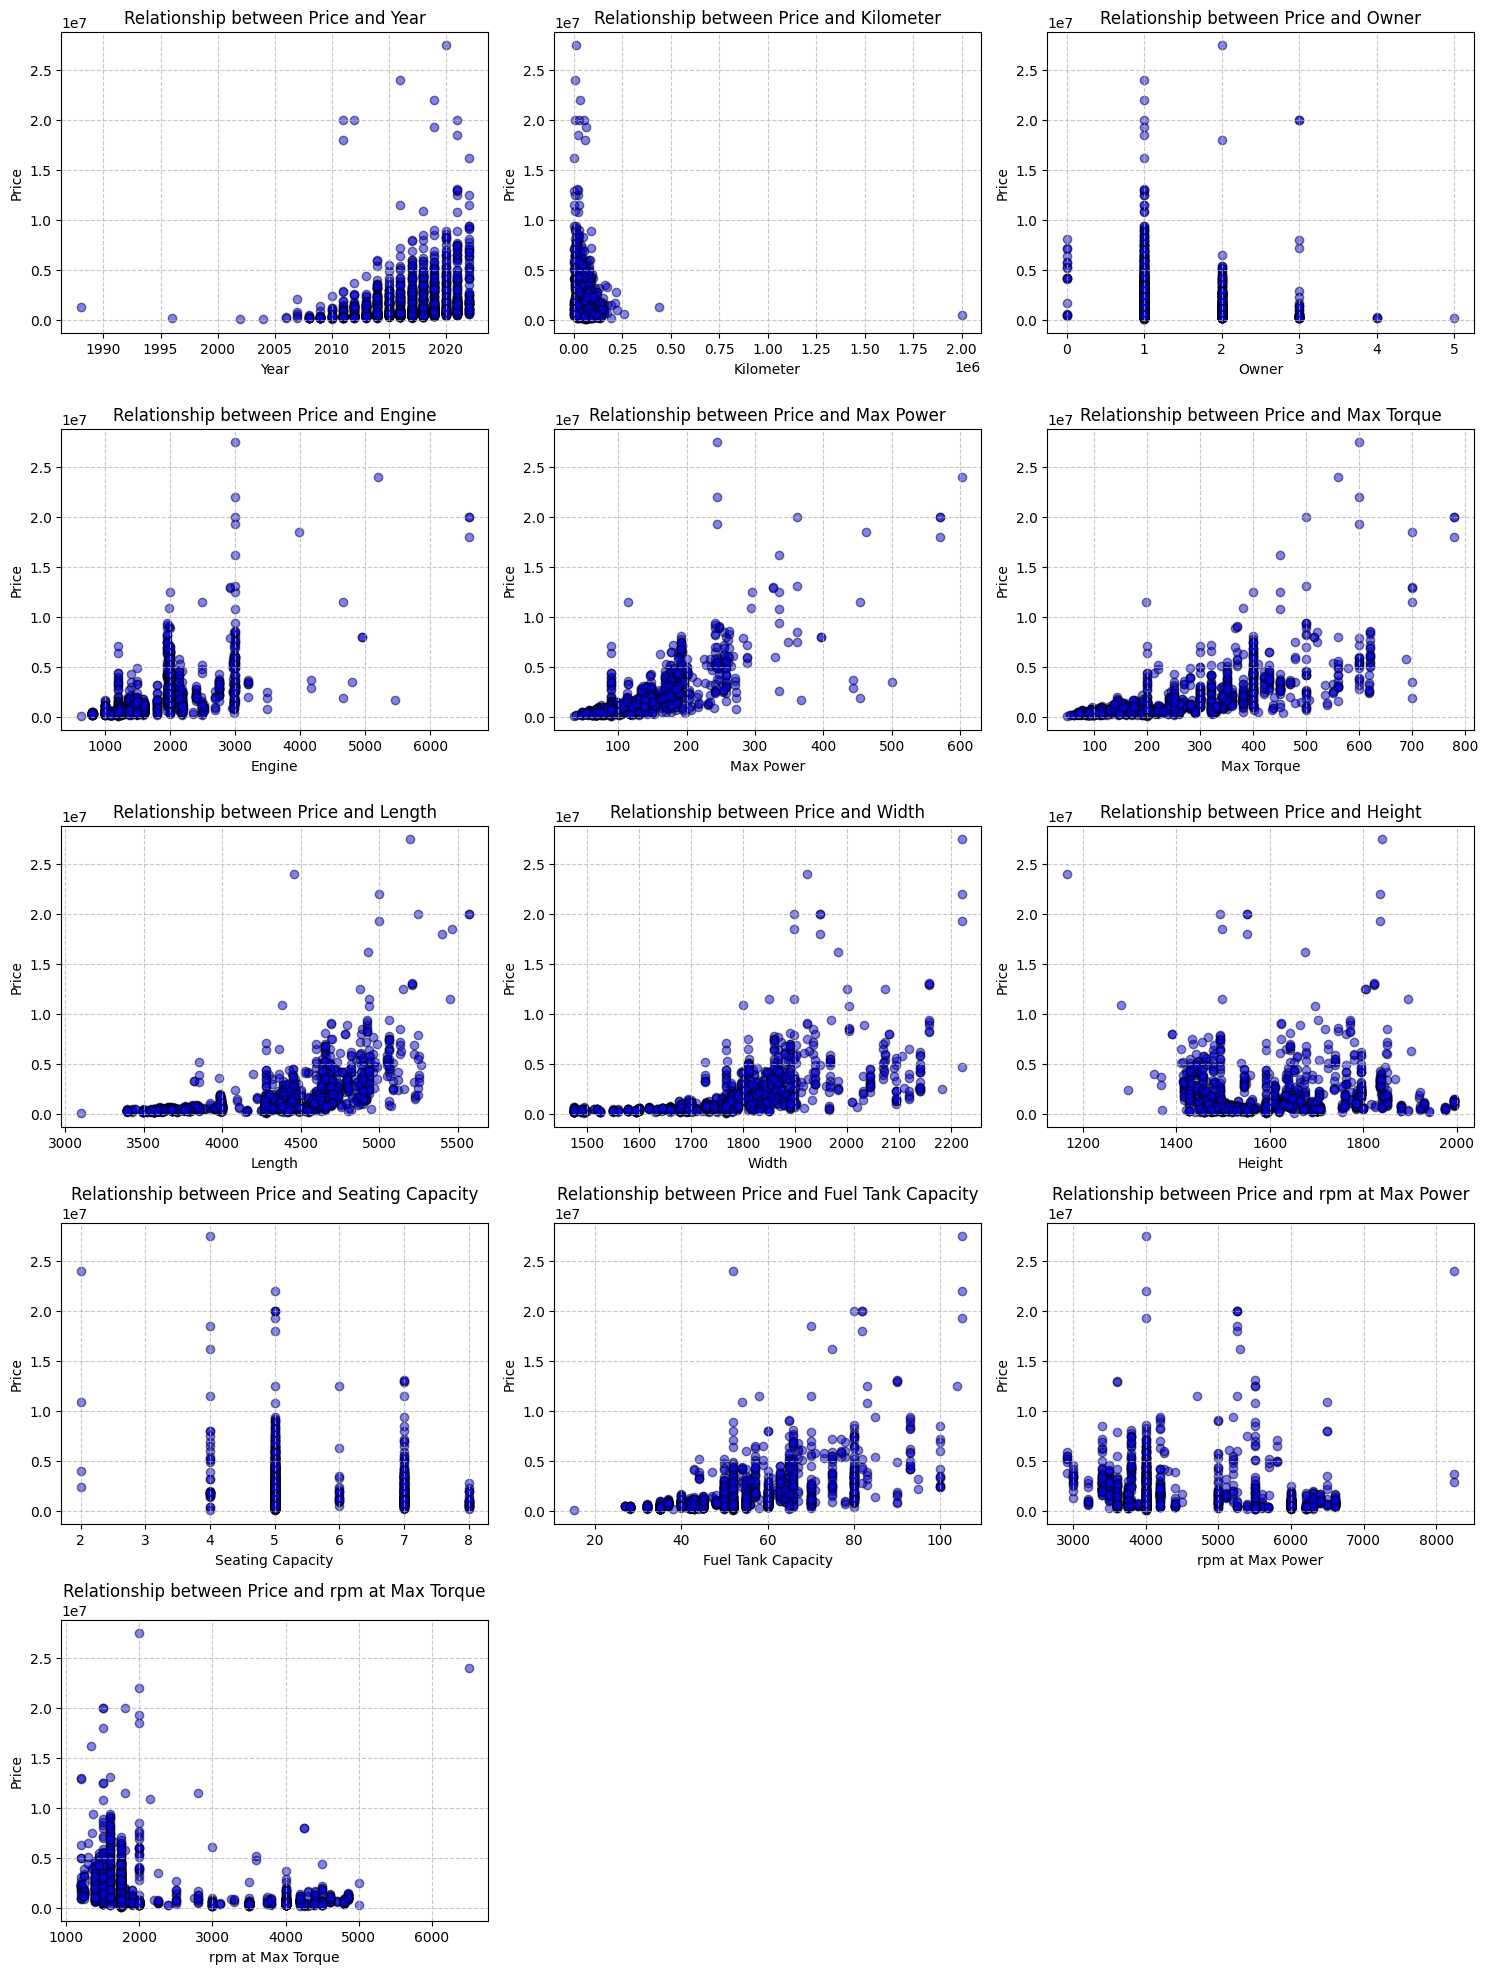

In [25]:
# 3. Scatter Plot: Relationship between Price and Numeric Columns
data.scatter_plot_for_numeric_columns()

## Part IV: Data Encoding and Data Normalization

#### IV.1: Data split: Train set and Validation set
Because we using target encoding, so we will split the dataset

In [26]:
train_data_after_preprocessing, validation_data_after_preprocessing = data_after_preprocessing.train_valid_split(valid_size=0.2, random_state=0)

#### IV.2: Data Encoding

In [27]:
train_data = copy.deepcopy(train_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = train_data.unique_values()
print()
validation_data = copy.deepcopy(validation_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = validation_data.unique_values()

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 785), ('Fuel Type', 7), ('Transmission', 2), ('Location', 75), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 504), ('Year', 19), ('Kilometer', 586), ('Owner', 6), ('Engine', 98), ('Max Power', 151), ('Max Torque', 122), ('Length', 216), ('Width', 150), ('Height', 180), ('Seating Capacity', 6), ('Fuel Tank Capacity', 49), ('rpm at Max Power', 35), ('rpm at Max Torque', 44)]

Object Columns and number of unique values: 8
[('Make', 23), ('Model', 284), ('Fuel Type', 6), ('Transmission', 2), ('Location', 49), ('Color', 14), ('Seller Type', 2), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 232), ('Year', 17), ('Kilometer', 212), ('Owner', 5), ('Engine', 65), ('Max Power', 91), ('Max Torque', 82), ('Length', 125), ('Width', 97), ('Height', 109), ('Seating Capacity', 6), ('Fuel Tank Capacity', 37), ('rpm at Max Power', 29),

In [28]:
train_data.encode_data()
train_data.get_column_after_transform_info()
train_data_after_encoding = copy.deepcopy(train_data)

validation_data.encode_data()
validation_data.get_column_after_transform_info()
validation_data_after_encoding = copy.deepcopy(validation_data)

Data encoding completed!

Information about the columns:
Data encoding completed!

Information about the columns:


#### IV.3: Data Normalization

In [29]:
train_data = copy.deepcopy(train_data_after_encoding)
train_data.data.describe()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,1.317000e+03,1.317000e+03,1.317000e+03,1317.000000,1.317000e+03,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,...,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,1.479659e+06,1.683559e+06,1.688176e+06,2016.436598,5.418505e+04,0.002278,0.446469,0.627942,0.180714,1.204252,...,127.804860,241.184510,1.401670,4276.719818,1766.591496,1591.232346,5.290812,51.982536,4751.312073,2543.649203
std,1.735823e+06,2.390192e+06,2.400416e+06,3.251836,6.241336e+04,0.047691,0.497315,0.483537,0.384927,0.496229,...,66.483634,138.731132,0.699824,440.015480,134.482398,134.238477,0.795895,14.768029,1080.668569,1182.014360
min,2.700000e+05,4.900000e+04,4.900000e+04,2002.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.000000,48.000000,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,2910.000000,1200.000000
25%,5.200000e+05,4.750000e+05,4.800000e+05,2014.000000,2.900000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,...,83.000000,115.000000,1.000000,3990.000000,1695.000000,1485.000000,5.000000,42.000000,4000.000000,1750.000000
50%,6.425000e+05,8.050000e+05,8.230000e+05,2017.000000,5.000000e+04,0.000000,0.000000,1.000000,0.000000,1.000000,...,109.000000,200.000000,1.000000,4315.000000,1767.000000,1550.000000,5.000000,50.000000,4000.000000,1750.000000
75%,1.791000e+06,1.875000e+06,1.850000e+06,2019.000000,7.200000e+04,0.000000,1.000000,1.000000,0.000000,1.000000,...,168.000000,343.000000,2.000000,4600.000000,1831.000000,1670.000000,5.000000,60.000000,6000.000000,4000.000000
max,2.400000e+07,2.400000e+07,2.400000e+07,2022.000000,2.000000e+06,1.000000,1.000000,1.000000,1.000000,5.000000,...,602.000000,780.000000,3.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,8250.000000,6500.000000


In [30]:
train_data.normalize_data()
train_data_after_normalization = copy.deepcopy(train_data)
train_data_after_normalization.head()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 31), ('Model', 473), ('Price', 504), ('Year', 19), ('Kilometer', 586), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 151), ('Max Torque', 122), ('Drivetrain', 3), ('Length', 216), ('Width', 150), ('Height', 180), ('Seating Capacity', 6), ('Fuel Tank Capacity', 49), ('rpm at Max Power', 35), ('rpm at Max Torque', 44), ('Price Norm', 504)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque,Price Norm
0,0.131901,0.074673,1400000,0.601191,0.017500,0.0,1.0,0.0,0.0,0.2,...,0.453552,0.5,0.617409,0.746309,0.318072,0.500000,0.500000,0.204120,0.103774,14.151984
1,0.052044,0.131560,2690000,0.750930,0.032500,0.0,1.0,0.0,0.0,0.2,...,0.549180,1.0,0.686640,0.510067,0.807229,0.833333,0.722222,0.091760,0.075472,14.805052
2,0.181943,0.180619,4375000,0.750930,0.015529,0.0,1.0,1.0,0.0,0.2,...,0.225410,0.5,0.735223,0.463087,0.343373,0.500000,0.555556,0.522472,0.622642,15.291417
3,0.028024,0.075195,1825000,1.000000,0.005500,0.0,1.0,1.0,1.0,0.2,...,0.344262,1.0,0.358704,0.463087,0.818072,0.333333,0.466667,0.157303,0.075472,14.417091
4,0.015697,0.016429,550000,0.800793,0.028000,0.0,0.0,1.0,0.0,0.2,...,0.090164,0.0,0.269636,0.248322,0.427711,0.500000,0.311111,0.578652,0.528302,13.217675


In [31]:
validation_data = copy.deepcopy(validation_data_after_encoding)
validation_data.data.describe()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,3.300000e+02,3.300000e+02,3.300000e+02,330.000000,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,1.497409e+06,1.717321e+06,1.730494e+06,2016.351515,54291.412121,0.0,0.478788,0.639394,0.142424,1.275758,...,130.184848,258.384848,1.496970,4300.393939,1771.436364,1597.112121,5.339394,52.787879,4583.230303,2374.612121
std,1.280127e+06,2.171674e+06,2.197913e+06,3.811367,39210.945109,0.0,0.500308,0.480906,0.350015,0.539915,...,57.089109,141.012083,0.764916,445.217289,136.551394,134.095448,0.839720,15.782830,1005.663997,1102.412652
min,3.325000e+05,1.149990e+05,1.149990e+05,1988.000000,600.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,46.000000,69.000000,1.000000,3395.000000,1475.000000,1297.000000,2.000000,27.000000,2910.000000,1200.000000
25%,5.000000e+05,4.675000e+05,4.762500e+05,2014.000000,28250.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,83.000000,115.000000,1.000000,3987.750000,1695.000000,1494.000000,5.000000,42.000000,3800.000000,1600.000000
50%,1.050000e+06,9.500000e+05,9.630000e+05,2017.000000,48579.500000,0.0,0.000000,1.000000,0.000000,1.000000,...,118.000000,235.000000,1.000000,4375.000000,1777.000000,1555.000000,5.000000,50.000000,4000.000000,1750.000000
75%,2.400000e+06,2.280625e+06,2.337500e+06,2019.000000,71667.250000,0.0,1.000000,1.000000,0.000000,1.000000,...,174.000000,360.000000,2.000000,4633.000000,1838.000000,1688.750000,5.000000,62.250000,5500.000000,3500.000000
max,5.900000e+06,2.750000e+07,2.750000e+07,2022.000000,440000.000000,0.0,1.000000,1.000000,1.000000,4.000000,...,335.000000,620.000000,3.000000,5265.000000,2220.000000,1995.000000,8.000000,105.000000,6600.000000,4800.000000


In [32]:
validation_data.normalize_data()
validation_data_after_normalization = copy.deepcopy(validation_data)
validation_data_after_normalization.data.describe()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 214), ('Price', 232), ('Year', 17), ('Kilometer', 212), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 5), ('Seller Type', 2), ('Engine', 65), ('Max Power', 91), ('Max Torque', 82), ('Drivetrain', 3), ('Length', 125), ('Width', 97), ('Height', 109), ('Seating Capacity', 6), ('Fuel Tank Capacity', 37), ('rpm at Max Power', 29), ('rpm at Max Torque', 29), ('Price Norm', 232)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque,Price Norm
count,330.000000,330.000000,3.300000e+02,330.000000,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.209234,0.058511,1.730494e+06,0.834932,0.122193,0.0,0.478788,0.639394,0.142424,0.318939,...,0.343711,0.248485,0.484168,0.397901,0.429960,0.556566,0.330614,0.453450,0.326281,13.864019
std,0.229928,0.079302,2.197913e+06,0.111665,0.089237,0.0,0.500308,0.480906,0.350015,0.134979,...,0.255920,0.382458,0.238084,0.183290,0.192114,0.139953,0.202344,0.272538,0.306226,0.994406
min,0.000000,0.000000,1.149990e+05,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.652687
25%,0.030085,0.012872,4.762500e+05,0.766226,0.062927,0.0,0.000000,0.000000,0.000000,0.250000,...,0.083485,0.000000,0.316979,0.295302,0.282235,0.500000,0.192308,0.241192,0.111111,13.073690
50%,0.128873,0.030491,9.630000e+05,0.854000,0.109193,0.0,0.000000,1.000000,0.000000,0.250000,...,0.301270,0.000000,0.524064,0.405369,0.369628,0.500000,0.294872,0.295393,0.152778,13.777732
75%,0.371352,0.079081,2.337500e+06,0.912443,0.161737,0.0,1.000000,1.000000,0.000000,0.250000,...,0.528131,0.500000,0.662032,0.487248,0.561246,0.500000,0.451923,0.701897,0.638889,14.664550
max,1.000000,1.000000,2.750000e+07,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.129697


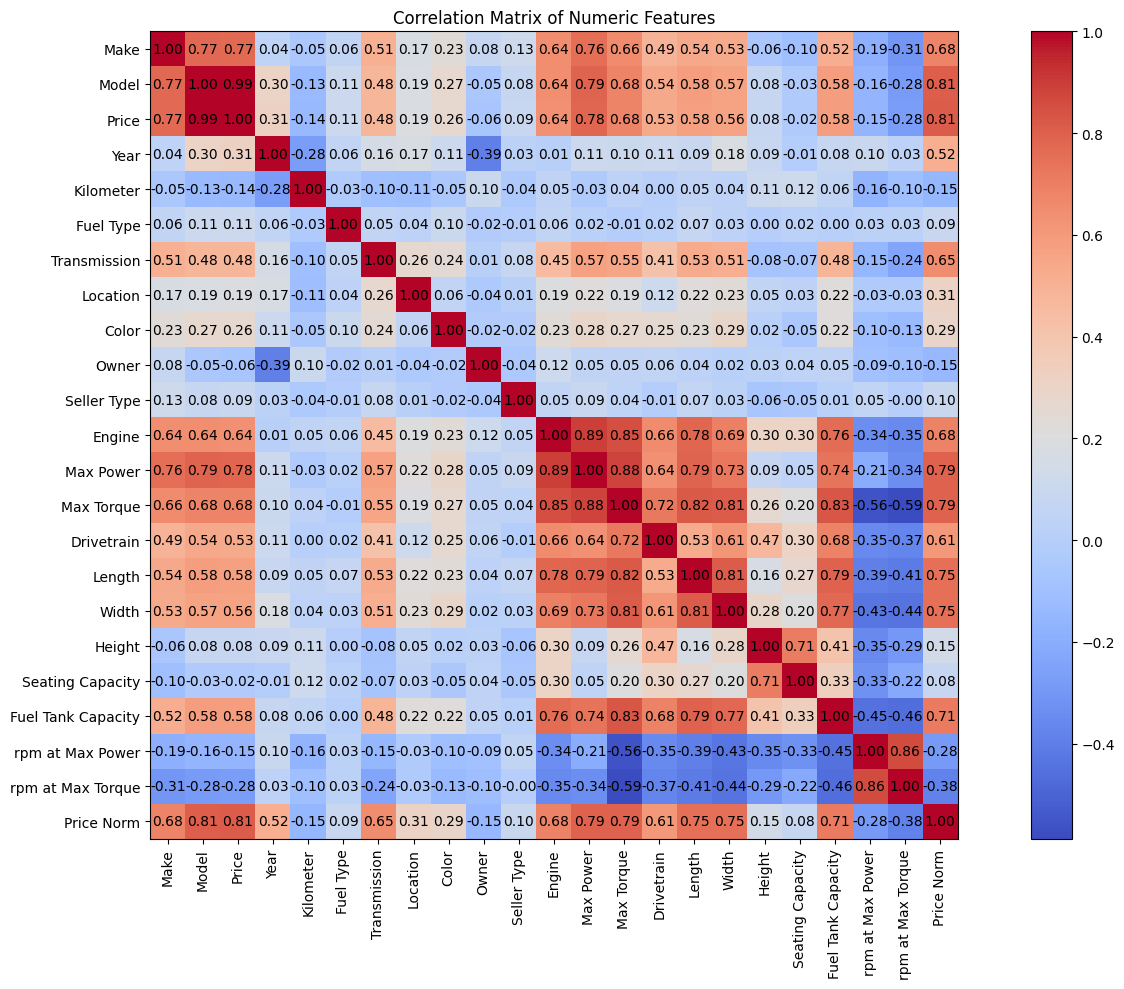

In [33]:
train_data_after_normalization.plot_corr_matrix(15, 10)

## Part V: Split dataset and tools to evaluate models

#### V.1: Split dataset

In [34]:
train_data = copy.deepcopy(train_data_after_normalization)
validation_data = copy.deepcopy(validation_data_after_normalization)
numeric_columns, object_columns = train_data.numeric_columns, train_data.object_columns
print(numeric_columns, len(numeric_columns))

train_data = train_data.data
validation_data = validation_data.data

# X_train = 80% of the data, y_train = 80% of the data
# X_val = 20% of the data, y_val = 20% of the data

X_train = train_data.drop(columns=['Price', 'Price Norm'])
y_train = train_data['Price']

X_val = validation_data.drop(columns=['Price', 'Price Norm'])
y_val = validation_data['Price']

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm at Max Power',
       'rpm at Max Torque', 'Price Norm'],
      dtype='object') 23


In [35]:
train_data.select_dtypes(include=['float64', 'int64']).columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm at Max Power',
       'rpm at Max Torque', 'Price Norm'],
      dtype='object')

In [36]:
numeric_columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm at Max Power',
       'rpm at Max Torque', 'Price Norm'],
      dtype='object')

#### V.2: Tools to evaluate the models

In [37]:
# Function to evaluate the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (SSE / SST) # R^2 = 1 - SSE/SST = SSR/SST

def evaluate_model(y_true, y_pred):
    model_eval = pd.DataFrame({
        'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
        'Value': [mse(y_true, y_pred), rmse(y_true, y_pred), mae(y_true, y_pred), r2_score(y_true, y_pred)]
    })

    return model_eval

## Part VI: Linear Regression models

#### VI.1: Simple Linear Regression model from Statistics's point of view
Based on Correlation coefficient map, **Model** maybe the best feature for model. We will prove it.

In [38]:
# Y = beta0 + beta1*X
# beta1 = Sxx / Sxy
# beta0 = mean(Y) - beta1 * mean(X)
# Sxx = sum((X - mean(X))^2)
# Sxy = sum((X - mean(X)) * (Y - mean(Y)))

def simple_linear_regression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

result = []

for F in numeric_columns.drop(['Price']):
    # Predict the price of a car based on feature F
    beta0, beta1 = simple_linear_regression(X_train[F], y_train)
    # print(f"{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

    # Predict the price of a car based on feature F
    y_pred = beta0 + beta1 * X_train[F]

    # Evaluate the model on train set
    model_eval = evaluate_model(y_train, y_pred)
    result.append([F, model_eval, beta0, beta1])

Metric = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for i, metric in enumerate(Metric):
    best = result[0]
    for res in result:
        if (res[1].iloc[i, 1] < best[1].iloc[i, 1] and metric != 'R^2 Score') or \
           (res[1].iloc[i, 1] > best[1].iloc[i, 1] and metric == 'R^2 Score'):
            best = res
    print(f"Best feature for {metric}: {best[0]}. Value: {best[1].iloc[i, 1]}")

print(f"\nConclusion: {best[0]} is the best feature for all metrics")
# => Max Power (best[0]) is the best feature for all metrics
id_BestFeature_in_result = [i for i in range(len(result)) if result[i][0] == best[0]][0]

beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]
F = result[id_BestFeature_in_result][0]
print(f"\n{F} formula: Price = {beta0:.2f} + {beta1:.2f} * {F}")

print("\nEvaluation metrics on Training Set:")
result[id_BestFeature_in_result][1]

KeyError: 'Price Norm'

In [ ]:
# Best model on training set:
print(f'Best feature: {result[id_BestFeature_in_result][0]}')
beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]

# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_train[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df.head(10)

In [ ]:
print("\nEvaluation metrics on Validation Set:")
y_pred = beta0 + beta1 * X_val['Model']

model_eval = evaluate_model(y_val, y_pred)
model_eval

In [ ]:
# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_val[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df.head(10)

#### VI.2: Multiple Linear Regression model

##### Build Model

In [39]:
class MultiLinearRegression:
    def __init__(self, X_train, y_train, X_val, y_val):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.thetas = np.zeros(self.X_train.shape[1])
        self.train_predictions = None
        self.val_predictions = None
        self.train_losses = []
        self.val_losses = []
        self.epochs = None

    def predict(self, X):
        """Make predictions for given input data"""
        return np.dot(X, self.thetas)

    def compute_loss(self, predictions, y):
        """Calculate mean squared error"""
        return np.mean((predictions - y) ** 2) / 2

    def gradient(self, X, predictions, y):
        """Compute gradients for weight updates"""
        return np.dot(X.T, (predictions - y)) / len(y)

    def update_weights(self, learning_rate, gradient):
        """Update model parameters"""
        return self.thetas - learning_rate * gradient

    def train(self, epochs, learning_rate, log_interval):
        """Train the model using gradient descent"""
        self.epochs = epochs
        for epoch in range(epochs):
            # Training predictions and loss
            self.train_predictions = self.predict(self.X_train)
            train_loss = self.compute_loss(self.train_predictions, self.y_train)
            self.train_losses.append(train_loss)

            # Validation predictions and loss
            self.val_predictions = self.predict(self.X_val)
            val_loss = self.compute_loss(self.val_predictions, self.y_val)
            self.val_losses.append(val_loss)

            # Update weights
            grad = self.gradient(self.X_train, self.train_predictions, self.y_train)
            self.thetas = self.update_weights(learning_rate, grad)

            if epoch % log_interval == 0:
                print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

        return self.thetas, self.train_losses, self.val_losses

    def get_parameters(self):
        """Return current model parameters"""
        return self.thetas

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.train_losses)), self.train_losses,
                label='Training Loss', color='blue', linewidth=2)
        plt.plot(range(len(self.val_losses)), self.val_losses,
                label='Validation Loss', color='red', linewidth=2)

        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title('Training and Validation Loss over Epochs', fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Set log scale for better visualization if losses vary greatly
        plt.yscale('log')

        plt.tight_layout()
        plt.show()

In [40]:
# Process data to fit different methods
def process_data(X, y, kind: str):
    if kind == 'bias':
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    elif kind == 'log':
        y = np.log(y)
    elif kind == 'custom':
        y = y / 1e7
    elif kind == 'min_max':
        min_y = np.min(y)
        max_y = np.max(y)
        y = (y - min_y) / (max_y - min_y)
    elif kind == 'standardization':
        mean_y = np.mean(y)
        std_y = np.std(y)
        y = (y - mean_y) / std_y

    return X, y

In [41]:
# Cross validation function
def k_fold_cross_validation(self, model_class, k, epochs, learning_rate, log_interval, kind=None):
    losses_of_each_cross = {}
    train_set = copy.deepcopy(self)
    val_set = copy.deepcopy(self)

    for i in range(k):
        train_end_1 = int(i/k * len(self.data))
        train_start_2 = int((i + 1)/k * len(self.data))

        val_start = int(i/k * len(self.data))
        val_end = int((i + 1)/k * len(self.data))

        train_set.data = pd.concat([self.data.iloc[:train_end_1], self.data.iloc[train_start_2:]], axis=0).copy()
        val_set.data = self.data.iloc[val_start:val_end].copy()

        train_set.encode_data()
        val_set.encode_data()

        train_set.normalize_data()
        val_set.normalize_data()

        train_data = train_set.data
        val_data = val_set.data

        X_train = train_data.drop(columns=['Price', 'Price Norm'])
        y_train = train_data['Price']
        X_train, y_train = process_data(X_train, y_train, kind)

        X_val = val_data.drop(columns=['Price', 'Price Norm'])
        y_val = val_data['Price']
        X_val, y_val = process_data(X_val, y_val, kind)

        print(f"Cross {i}: ")
        multiLR = model_class(X_train, y_train, X_val, y_val)
        _, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)

        loss = {
            f'Cross {i}': {
                'Train loss': train_losses,
                'Val loss': val_losses
            }
        }
        losses_of_each_cross.update(loss)

        print('\n')

    return losses_of_each_cross

DataProcessor.k_fold_cross_validation = k_fold_cross_validation

In [43]:
def plot_cross_validation(cross_validation_losses):
    k = len(cross_validation_losses)

    # Tính số hàng và số cột sao cho chia đều nhất có thể
    # Sử dụng căn bậc hai của k để tìm số cột và số hàng gần cân bằng
    ncols = int(np.ceil(np.sqrt(k)))  # Số cột gần với căn bậc hai của k
    nrows = int(np.ceil(k / ncols))   # Số hàng cần thiết để chứa tất cả đồ thị

    # Tạo figure và axes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharex=True, sharey=False)

    # Nếu chỉ có 1 hàng hoặc 1 cột, chuyển axes thành mảng 1D hoặc 2D cho dễ truy cập
    if nrows == 1:
        axes = np.array([axes]) if ncols > 1 else np.array([axes])
    else:
        axes = np.array(axes)

    # Duyệt qua từng cross và vẽ losses
    for idx, (cross, losses) in enumerate(cross_validation_losses.items()):
        train_losses = losses['Train loss']
        val_losses = losses['Val loss']

        # Giả sử train_losses và val_losses là danh sách các giá trị loss qua các epoch
        epochs = range(1, len(train_losses) + 1)

        # Tính vị trí subplot (hàng và cột)
        row = idx // ncols
        col = idx % ncols

        # Vẽ train loss
        axes[row, col].plot(epochs, train_losses, label='Train Loss', linestyle='-', color='blue', alpha=0.7)

        # Vẽ validation loss
        axes[row, col].plot(epochs, val_losses, label='Val Loss', linestyle='--', color='orange', alpha=0.7)

        # Tùy chỉnh subplot
        axes[row, col].set_title(f'{cross}')
        axes[row, col].set_ylabel('Loss')
        axes[row, col].legend()
        axes[row, col].grid(True)

        # Chỉ đặt nhãn trục x cho các subplot ở hàng cuối
        if row == nrows - 1:
            axes[row, col].set_xlabel('Epoch')

    # Ẩn các subplot không dùng đến (nếu có)
    for idx in range(k, nrows * ncols):
        row = idx // ncols
        col = idx % ncols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

###### Prepare data

In [44]:
# Add bias
X_train_bias = np.hstack((np.ones(shape=(X_train.shape[0], 1)), X_train))
X_val_bias = np.hstack((np.ones(shape=(X_val.shape[0], 1)), X_val))

# Custom
y_train_custom = y_train / 1e7
y_val_custom = y_val / 1e7

# Log transformation
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# Min-Max scaler
train_min = np.min(y_train)
train_max = np.max(y_train)

val_min = np.min(y_val)
val_max = np.max(y_val)

y_train_scaled = (y_train - train_min) / (train_max - train_min)
y_val_scaled = (y_val - val_min) / (val_max - val_min)

# Standardization
train_mean = np.mean(y_train)
train_std = np.std(y_train)
val_mean = np.mean(y_val)
val_std = np.std(y_val)

y_train_standardized = (y_train - train_mean) / train_std
y_val_standardized = (y_val - val_mean) / val_std

In [ ]:
methods = {
    'Without bias': MultiLinearRegression(X_train, y_train, X_val, y_val),
    'With bias': MultiLinearRegression(X_train_bias, y_train, X_val_bias, y_val),
    'Custom': MultiLinearRegression(X_train_bias, y_train_custom, X_val_bias, y_val_custom),
    'Log transformation': MultiLinearRegression(X_train_bias, y_train_log, X_val_bias, y_val_log),
    'Min-Max scaler': MultiLinearRegression(X_train_bias, y_train_scaled, X_val_bias, y_val_scaled),
    'Standardization': MultiLinearRegression(X_train_bias, y_train_standardized, X_val_bias, y_val_standardized)
}

In [113]:
losses = {}
evaluations = []
evaluations_label_normalized = []

We will experimenting different model to find out which one works out the best. Base model is using all features and no bias. Next models are built to be expected to outperform this one.

###### Without bias (base)

In [114]:
epochs = 10000
learning_rate = 0.2
log_interval = 1000
thetas, train_losses, val_losses = [], [], []

In [115]:
multiLR = MultiLinearRegression(X_train, y_train, X_val, y_val)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['Without bias'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 4303781163282.4839 | Val Loss: 3905396199675.7847
Epoch: 1000 | Train Loss: 208551309632.2097 | Val Loss: 1573174985834.3359
Epoch: 2000 | Train Loss: 90103803838.0325 | Val Loss: 863038715083.8362
Epoch: 3000 | Train Loss: 56634202341.8156 | Val Loss: 455724915705.1771
Epoch: 4000 | Train Loss: 44046727936.9979 | Val Loss: 255546513268.5971
Epoch: 5000 | Train Loss: 38285313187.6683 | Val Loss: 159484588142.1635
Epoch: 6000 | Train Loss: 35271025131.9372 | Val Loss: 114372157521.5468
Epoch: 7000 | Train Loss: 33562008287.2951 | Val Loss: 94343358134.1127
Epoch: 8000 | Train Loss: 32544966879.3524 | Val Loss: 86606726404.7901
Epoch: 9000 | Train Loss: 31919005766.1411 | Val Loss: 84720435080.5564


In [116]:
# Cross validation
k = 5
kind = None
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

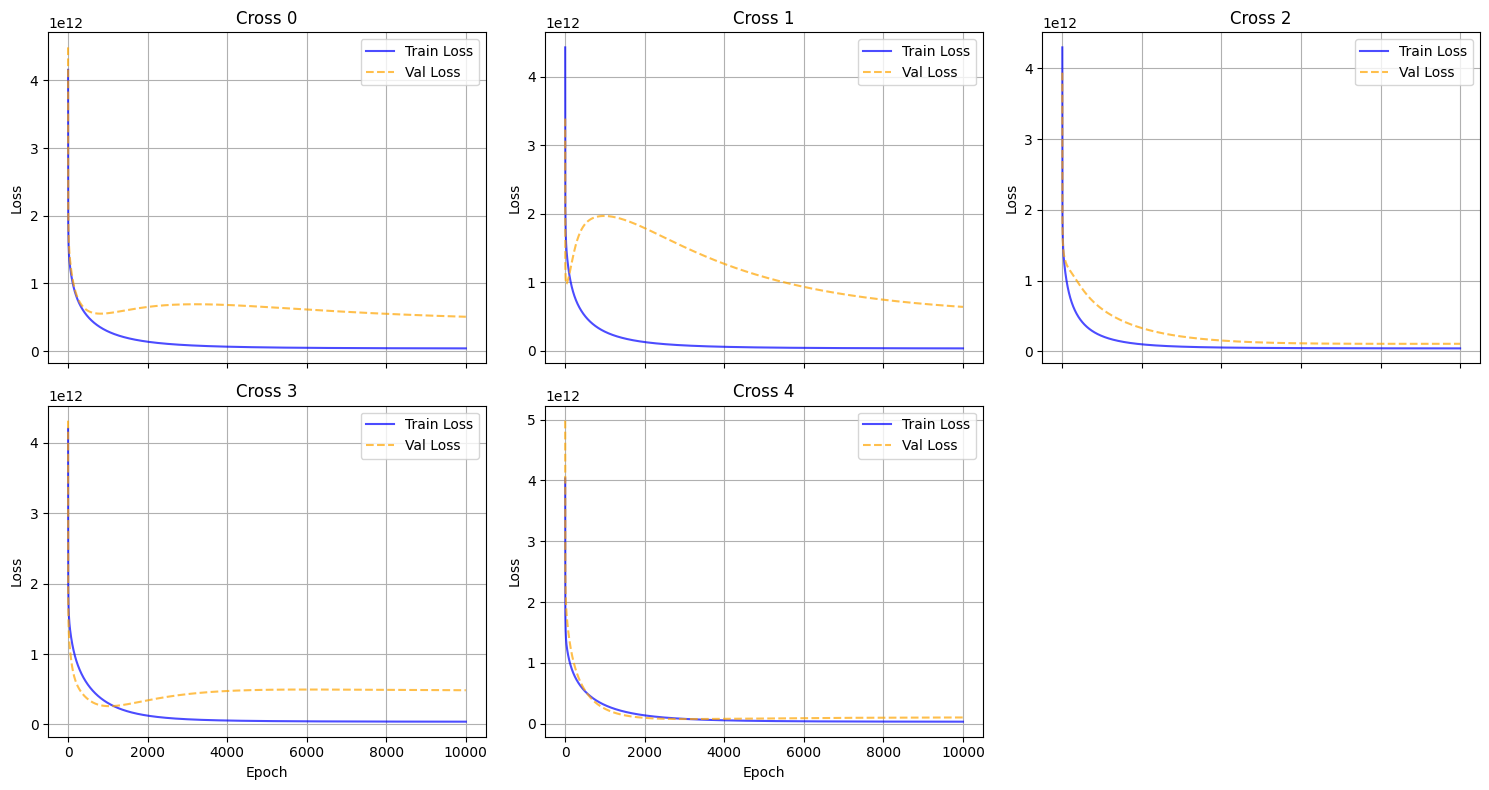

In [117]:
plot_cross_validation(cross_validation_losses)

The sudden spike in the second cross is high likely due to noise or mismatch in distributions.

In [118]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

###### With bias

We will add a bias parameter to increase model's complexity.

In [119]:
epochs = 10000
learning_rate = 0.2
log_interval = 1000
thetas, train_losses, val_losses = [], [], []

In [120]:
multiLR = MultiLinearRegression(X_train_bias, y_train, X_val_bias, y_val)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['With bias'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 4303781163282.4839 | Val Loss: 3905396199675.7847
Epoch: 1000 | Train Loss: 204980161472.7501 | Val Loss: 1768281330448.2944
Epoch: 2000 | Train Loss: 91593331332.6494 | Val Loss: 1031221320842.6608
Epoch: 3000 | Train Loss: 58446010879.0630 | Val Loss: 566171982563.8142
Epoch: 4000 | Train Loss: 45522528180.1172 | Val Loss: 323499890161.4150
Epoch: 5000 | Train Loss: 39406975195.6906 | Val Loss: 199101633758.6566
Epoch: 6000 | Train Loss: 36096459197.7383 | Val Loss: 135335780410.0375
Epoch: 7000 | Train Loss: 34152789881.8065 | Val Loss: 103163934842.3658
Epoch: 8000 | Train Loss: 32956240594.5575 | Val Loss: 87681738250.0445
Epoch: 9000 | Train Loss: 32196947473.9389 | Val Loss: 81009378832.5308


In [121]:
# Cross validation
k = 5
kind = 'bias'
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

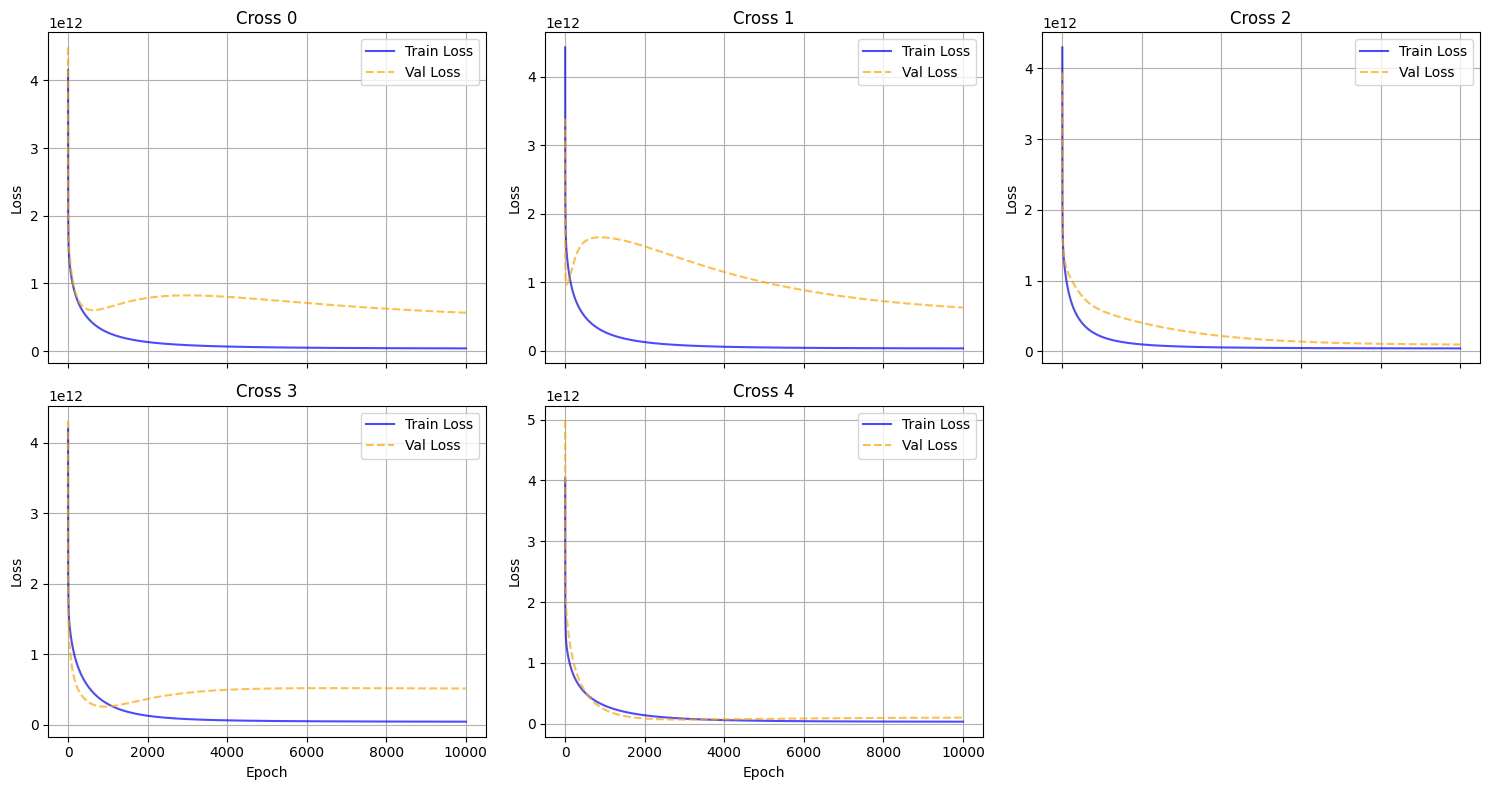

In [122]:
plot_cross_validation(cross_validation_losses)

In [123]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

##### Label Normalization
Up to now we have been working on normalized features to predicted original labels. This time we will try scaling label to smaller range for easier training.

###### Custom

In [124]:
epochs = 50
learning_rate = 0.1
log_interval = 5
thetas, train_losses, val_losses = [], [], []

In [125]:
multiLR = MultiLinearRegression(X_train_bias, y_train_custom, X_val_bias, y_val_custom)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['Custom'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 0.0430 | Val Loss: 0.0391
Epoch: 5 | Train Loss: 0.0218 | Val Loss: 0.0173
Epoch: 10 | Train Loss: 0.0199 | Val Loss: 0.0158
Epoch: 15 | Train Loss: 0.0186 | Val Loss: 0.0148
Epoch: 20 | Train Loss: 0.0175 | Val Loss: 0.0141
Epoch: 25 | Train Loss: 0.0167 | Val Loss: 0.0136
Epoch: 30 | Train Loss: 0.0161 | Val Loss: 0.0133
Epoch: 35 | Train Loss: 0.0155 | Val Loss: 0.0131
Epoch: 40 | Train Loss: 0.0151 | Val Loss: 0.0130
Epoch: 45 | Train Loss: 0.0147 | Val Loss: 0.0130


In [126]:
# Cross validation
k = 5
kind = 'custom'
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

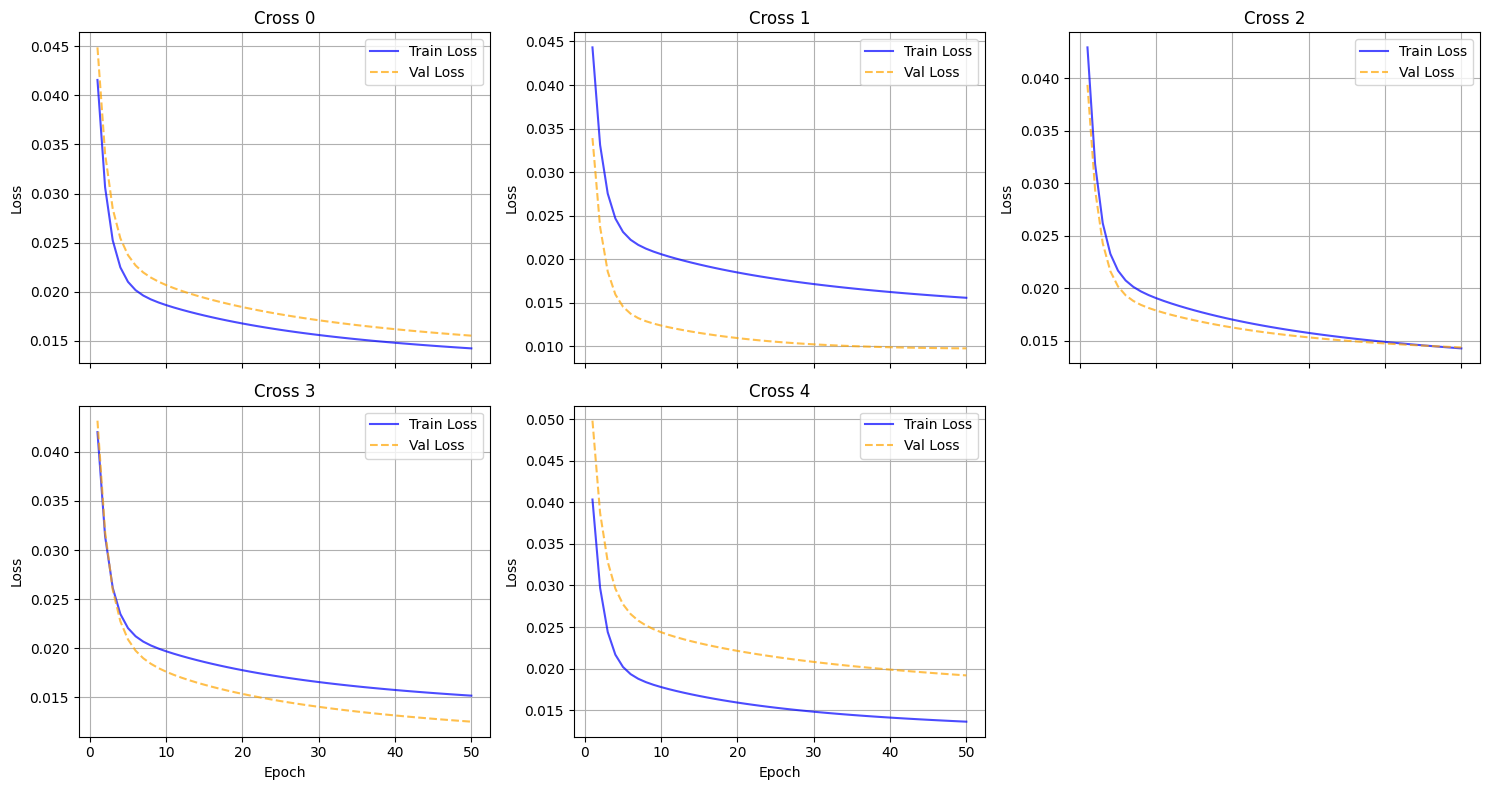

In [127]:
plot_cross_validation(cross_validation_losses)

As expected, the training speed up incredibly fast.

In [128]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_custom, y_pred).loc[:, 'Value'])

In [129]:
# Retransform to initial range
y_pred = multiLR.predict(X_val_bias)
y_pred_original = y_pred * 1e7
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

###### Log Transformation

In [130]:
epochs = 50
learning_rate = 0.1
log_interval = 5
thetas, train_losses, val_losses = [], [], []

In [131]:
multiLR = MultiLinearRegression(X_train_bias, y_train_log, X_val_bias, y_val_log)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['Log transformation'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 95.5977 | Val Loss: 96.5984
Epoch: 5 | Train Loss: 2.5153 | Val Loss: 2.2243
Epoch: 10 | Train Loss: 1.4542 | Val Loss: 1.8810
Epoch: 15 | Train Loss: 1.2079 | Val Loss: 1.6570
Epoch: 20 | Train Loss: 1.0244 | Val Loss: 1.4403
Epoch: 25 | Train Loss: 0.8836 | Val Loss: 1.2709
Epoch: 30 | Train Loss: 0.7747 | Val Loss: 1.1408
Epoch: 35 | Train Loss: 0.6898 | Val Loss: 1.0404
Epoch: 40 | Train Loss: 0.6231 | Val Loss: 0.9623
Epoch: 45 | Train Loss: 0.5702 | Val Loss: 0.9009


In [132]:
# Cross validation
k = 5
kind = 'log'
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

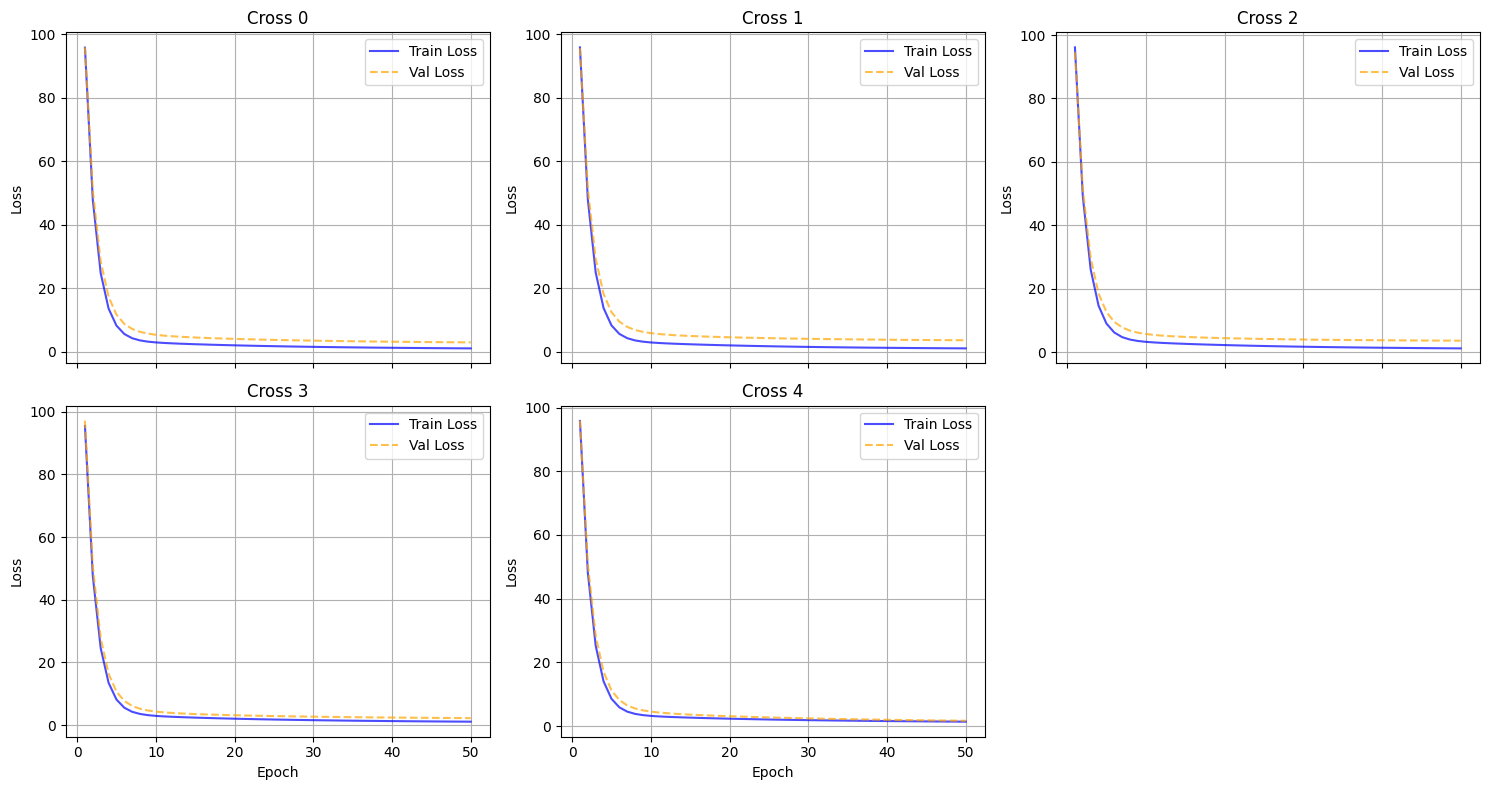

In [133]:
plot_cross_validation(cross_validation_losses)

Model converged after only 10 epochs, and the losses are showing positive results as well. However, both predictions and labels are transformed while the expected final results are real prices so we have to denormalize it to initial range.

In [134]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_log, y_pred).loc[:, 'Value'])

In [135]:
# Retransform to initial range
y_pred = multiLR.predict(X_val_bias)
y_pred_original = np.exp(y_pred)
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

###### Min-Max Scaler

In [136]:
epochs = 100
learning_rate = 0.1
log_interval = 10
thetas, train_losses, val_losses = [], [], []

In [137]:
multiLR = MultiLinearRegression(X_train_bias, y_train_scaled, X_val_bias, y_val_scaled)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['Min-Max scaler'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 0.0074 | Val Loss: 0.0050
Epoch: 10 | Train Loss: 0.0035 | Val Loss: 0.0022
Epoch: 20 | Train Loss: 0.0031 | Val Loss: 0.0020
Epoch: 30 | Train Loss: 0.0028 | Val Loss: 0.0020
Epoch: 40 | Train Loss: 0.0026 | Val Loss: 0.0020
Epoch: 50 | Train Loss: 0.0025 | Val Loss: 0.0020
Epoch: 60 | Train Loss: 0.0024 | Val Loss: 0.0021
Epoch: 70 | Train Loss: 0.0023 | Val Loss: 0.0021
Epoch: 80 | Train Loss: 0.0023 | Val Loss: 0.0022
Epoch: 90 | Train Loss: 0.0022 | Val Loss: 0.0022


In [138]:
# Cross validation
k = 5
kind = 'min_max'
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

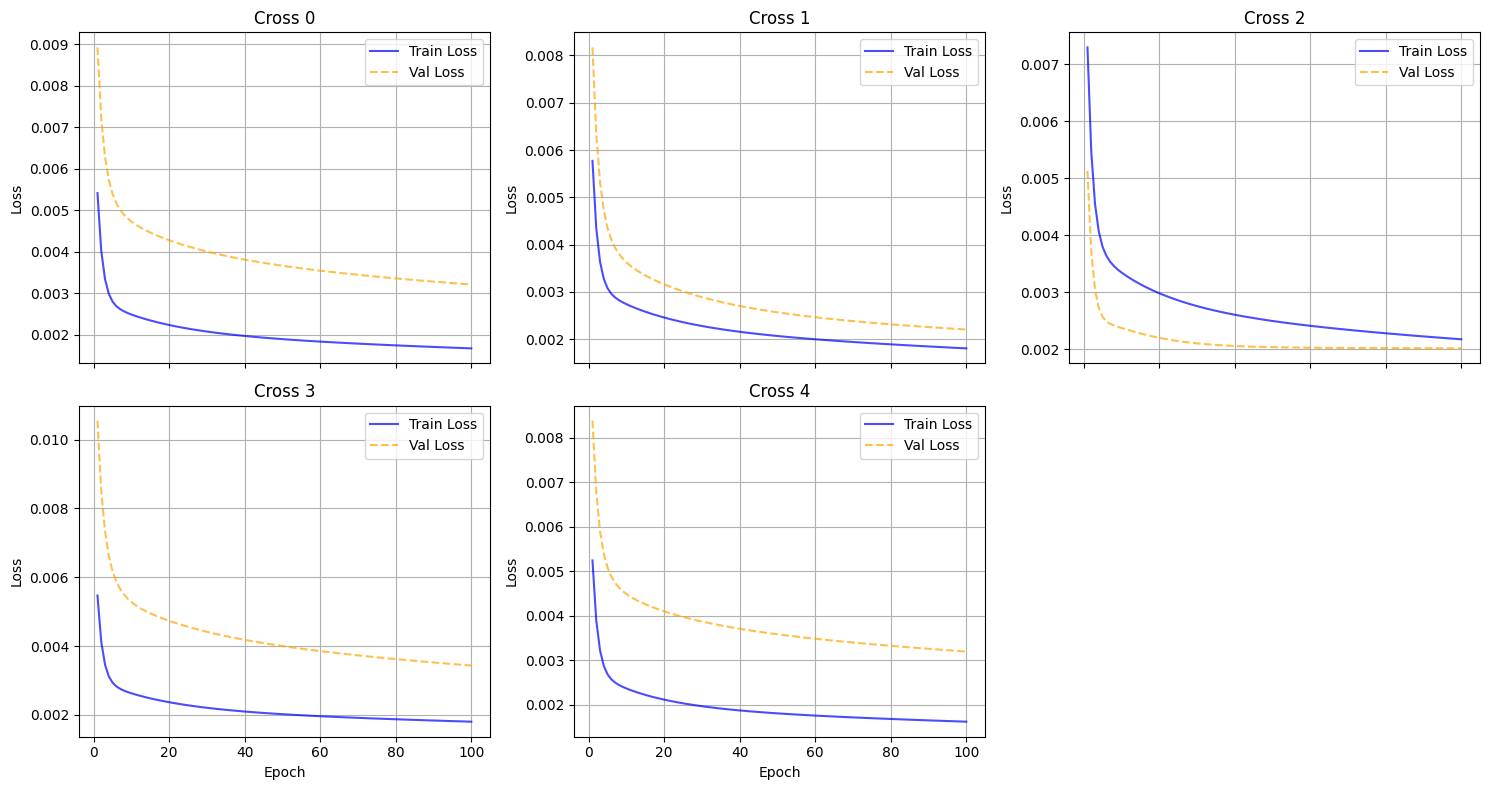

In [139]:
plot_cross_validation(cross_validation_losses)

In [140]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_scaled, y_pred).loc[:, 'Value'])

In [141]:
# Retransform to initial range
y_pred_original = y_pred * (train_max - train_min) + train_min
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

###### Standardization

In [142]:
epochs = 5000
learning_rate = 0.1
log_interval = 500
thetas, train_losses, val_losses = [], [], []

In [143]:
multiLR = MultiLinearRegression(X_train_bias, y_train_standardized, X_val_bias, y_val_standardized)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
losses['Standardization'] = [train_losses, val_losses]

Epoch: 0 | Train Loss: 0.5000 | Val Loss: 0.5000
Epoch: 500 | Train Loss: 0.1104 | Val Loss: 0.3193
Epoch: 1000 | Train Loss: 0.0683 | Val Loss: 0.3459
Epoch: 1500 | Train Loss: 0.0475 | Val Loss: 0.3312
Epoch: 2000 | Train Loss: 0.0353 | Val Loss: 0.3018
Epoch: 2500 | Train Loss: 0.0274 | Val Loss: 0.2680
Epoch: 3000 | Train Loss: 0.0221 | Val Loss: 0.2343
Epoch: 3500 | Train Loss: 0.0184 | Val Loss: 0.2030
Epoch: 4000 | Train Loss: 0.0157 | Val Loss: 0.1750
Epoch: 4500 | Train Loss: 0.0137 | Val Loss: 0.1505


In [144]:
# Cross validation
k = 5
kind = 'standardization'
cross_validation_losses = {}
cross_validation_losses = data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 29), ('Model', 484), ('Price', 513), ('Year', 21), ('Kilometer', 596), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Max Power', 143), ('Max Torque', 123), ('Drivetrain', 3), ('Length', 218), ('Width', 156), ('Height', 177), ('Seating Capacity', 6), ('Fuel Tank Capacity', 48), ('rpm at Max Power', 34), ('rpm at Max Torque', 43), ('Price Norm', 513)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 23), ('Model', 215), ('Price', 231), ('Year', 15), ('Kilometer', 203), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 65), ('Max Power', 96), ('Max Torque', 79), ('Drivetrain', 3), ('Length', 122), ('Width', 

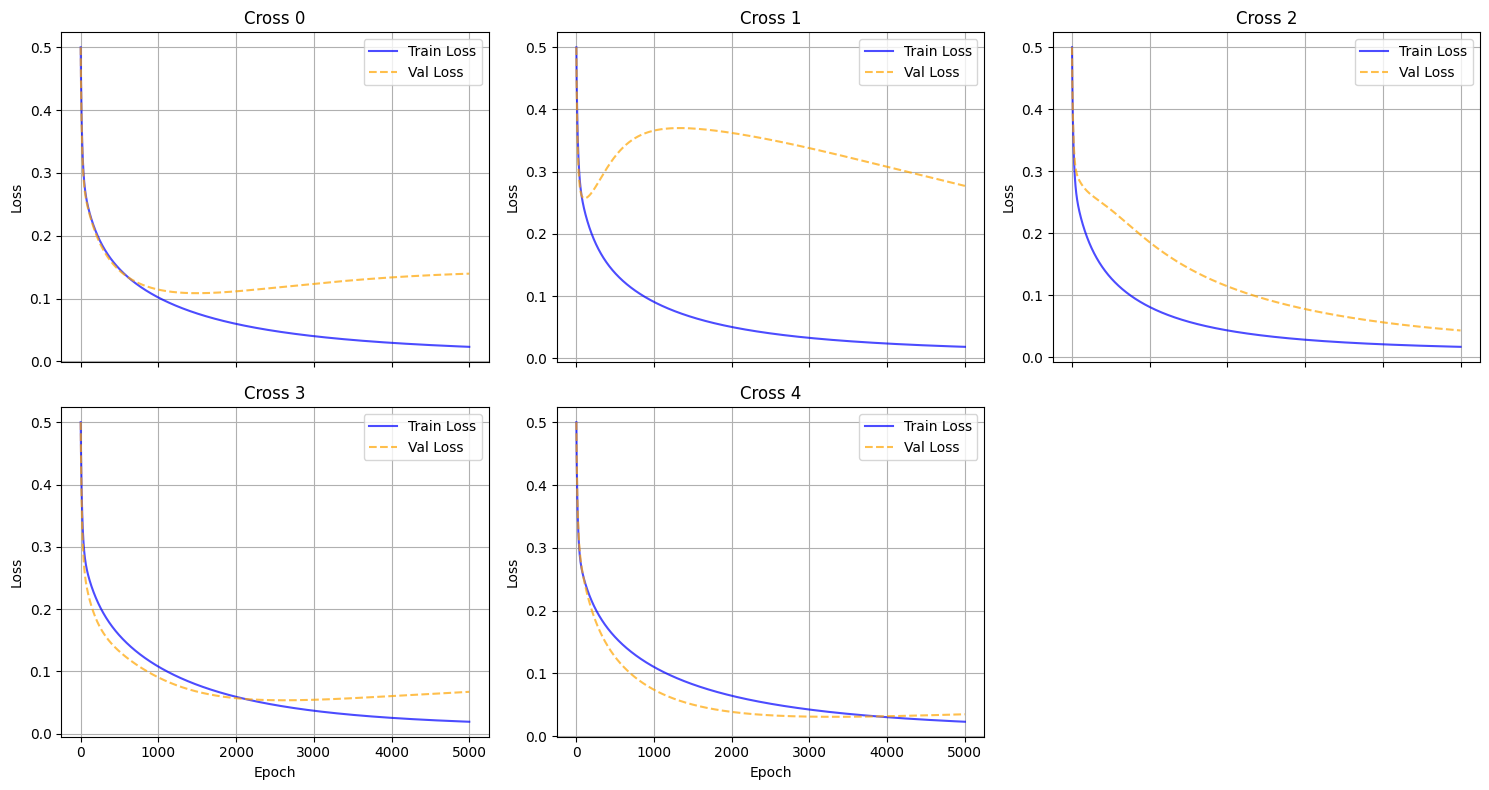

In [145]:
plot_cross_validation(cross_validation_losses)

In [146]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_standardized, y_pred).loc[:, 'Value'])

In [147]:
# Retransform to initial range
y_pred_original = y_pred * val_std + val_mean
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

###### Summary

In [148]:
# Evaluation summary
summary = pd.concat(evaluations, axis=1)
summary.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary.columns = ['Without bias (base)', 'With bias', 'Custom', 'Log transformation', 'Min-Max scaler', 'Standardization']
summary

,Without bias (base),With bias,Custom,Log transformation,Min-Max scaler,Standardization
Mean Squared Error,1.708499e+11,1.577945e+11,2.589295e+12,3.230350e+14,2.664627e+12,1.247703e+12
Root Mean Squared Error,4.133399e+05,3.972336e+05,1.609129e+06,1.797317e+07,1.632369e+06,1.117006e+06
Mean Absolute Error,2.626288e+05,2.429688e+05,8.484042e+05,6.547750e+06,9.458807e+05,7.655685e+05
R^2 Score,9.645259e-01,9.672366e-01,4.623761e-01,-6.607281e+01,4.467347e-01,7.409353e-01


In [149]:
# Evaluation summary on normalized labels
summary_label_normalized = pd.concat(evaluations_label_normalized, axis=1)
summary_label_normalized.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary_label_normalized.columns = ['Custom', 'Log transformation', 'Min-Max scaler', 'Standardization']
summary_label_normalized

,Custom,Log transformation,Min-Max scaler,Standardization
Mean Squared Error,0.025893,1.704606,0.004568,0.259065
Root Mean Squared Error,0.160913,1.305606,0.067588,0.508984
Mean Absolute Error,0.084840,1.040132,0.043623,0.348845
R^2 Score,0.462376,-0.729076,0.288679,0.740935


After trials of different methods, the model with bias produces the best R2 score, the losses are high is due to large disparity in range between features and labels.

In [158]:
data_after_preprocessing.data['Price'].describe()

,Price
count,1.647000e+03
mean,1.696655e+06
std,2.360649e+06
min,4.900000e+04
25%,4.775000e+05
50%,8.250000e+05
75%,1.950000e+06
max,2.750000e+07


However, high R2 score is telling the model can explain 96,7% variance in data, so base model and model with bias are doing a good job, followed by Standardization method.

###### PCA for dimentionality reduction

In [150]:
def compute_pca_and_plot_eigenvalues(data_after_preprocessing, threshold=None):
    """
    Tính PCA từ đầu, vẽ biểu đồ giá trị eigenvalue từ cao xuống thấp, và lọc các đặc trưng dựa trên ngưỡng eigenvalue.

    Parameters:
    - data_after_preprocessing: Đối tượng chứa dữ liệu (có phương thức encode_data và normalize_data)
    - threshold: Ngưỡng eigenvalue để lọc các thành phần chính (nếu None, trả về tất cả)

    Returns:
    - eigenvalues: Danh sách các giá trị riêng (eigenvalues) đã sắp xếp
    - eigenvectors: Ma trận các vector riêng (eigenvectors) đã sắp xếp
    - selected_features: Danh sách các đặc trưng tương ứng với các thành phần chính thỏa mãn ngưỡng
    """
    # Bước 1: Chuẩn bị dữ liệu
    data = copy.deepcopy(data_after_preprocessing)
    data.encode_data()
    data.normalize_data()

    # Loại bỏ các cột không phải đặc trưng
    data.data = data.data.drop(columns=['Price', 'Price Norm'])

    # Bước 2: Tính ma trận hiệp phương sai
    covariance_matrix = np.cov(data.data, rowvar=False)

    # Bước 3: Tính eigenvalue và eigenvector
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sắp xếp eigenvalue và eigenvector theo thứ tự giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Từ cao xuống thấp
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Bước 4: Tìm đặc trưng quan trọng nhất cho mỗi thành phần chính
    dominant_features = []
    for i in range(eigenvectors.shape[1]):  # Duyệt qua từng thành phần chính
        eigenvector = eigenvectors[:, i]
        dominant_feature_idx = np.argmax(np.abs(eigenvector))  # Đặc trưng có hệ số lớn nhất
        dominant_feature = data.data.columns.tolist()[dominant_feature_idx]
        dominant_features.append(dominant_feature)

    # Bước 5: Lọc các thành phần chính dựa trên ngưỡng eigenvalue
    if threshold is not None:
        # Tìm các thành phần chính có eigenvalue >= threshold
        selected_indices = np.where(eigenvalues >= threshold)[0]
        selected_eigenvalues = eigenvalues[selected_indices]
        selected_eigenvectors = eigenvectors[:, selected_indices]
        selected_features = [dominant_features[i] for i in selected_indices]
    else:
        # Nếu không có ngưỡng, trả về tất cả
        selected_eigenvalues = eigenvalues
        selected_eigenvectors = eigenvectors
        selected_features = dominant_features

    # Bước 6: Vẽ biểu đồ dạng bar cho eigenvalue
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='skyblue', edgecolor='black')

    # Thêm tên đặc trưng quan trọng nhất lên trên mỗi bar
    for bar, feature in zip(bars, dominant_features):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, feature,
                ha='center', va='bottom', rotation=45, fontsize=8)

    # Tùy chỉnh biểu đồ
    ax.set_title('Eigenvalues of Principal Components with Dominant Features')
    ax.set_xlabel('Principal Component Index')
    ax.set_ylabel('Eigenvalue')
    ax.set_xticks(range(1, len(eigenvalues) + 1))
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Điều chỉnh layout để tránh chồng chéo
    plt.tight_layout()
    plt.show()

    # Tính tỷ lệ phương sai được giải thích
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    print("Explained variance ratio for each component:")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"PC{i+1}: {ratio:.4f} (Dominant feature: {dominant_features[i]})")

    # In các đặc trưng được chọn dựa trên ngưỡng
    if threshold is not None:
        print(f"\nSelected components with eigenvalue >= {threshold}:")
        for i, (eigenvalue, feature) in enumerate(zip(selected_eigenvalues, selected_features)):
            print(f"PC{i+1}: Eigenvalue = {eigenvalue:.4f}, Dominant feature = {feature}")

    return selected_eigenvalues, selected_eigenvectors, selected_features

Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 23
[('Make', 30), ('Model', 529), ('Price', 564), ('Year', 21), ('Kilometer', 701), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Drivetrain', 3), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45), ('Price Norm', 564)]
Data normalization completed!


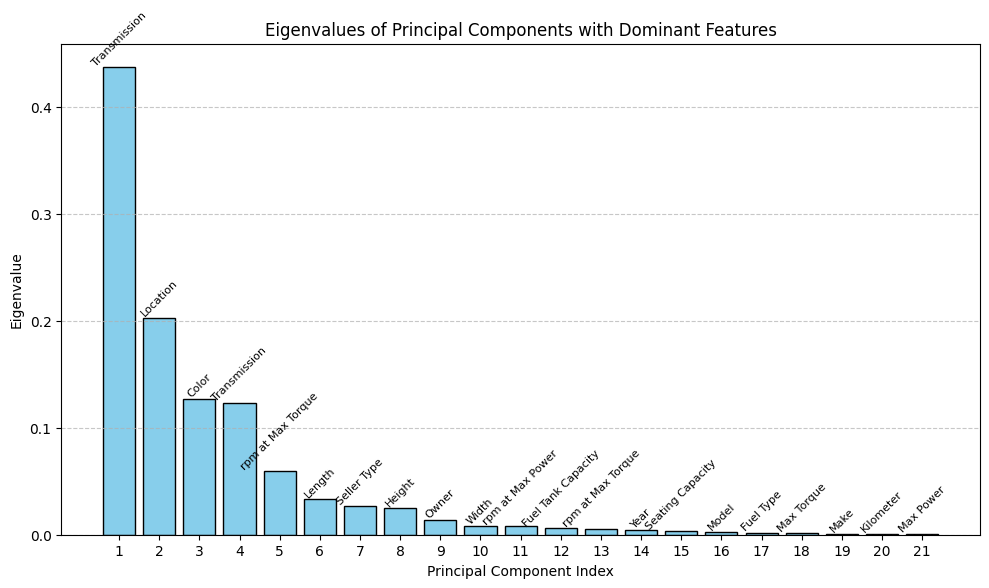

Explained variance ratio for each component:
PC1: 0.4002 (Dominant feature: Transmission)
PC2: 0.1854 (Dominant feature: Location)
PC3: 0.1160 (Dominant feature: Color)
PC4: 0.1129 (Dominant feature: Transmission)
PC5: 0.0543 (Dominant feature: rpm at Max Torque)
PC6: 0.0306 (Dominant feature: Length)
PC7: 0.0245 (Dominant feature: Seller Type)
PC8: 0.0225 (Dominant feature: Height)
PC9: 0.0130 (Dominant feature: Owner)
PC10: 0.0075 (Dominant feature: Width)
PC11: 0.0074 (Dominant feature: rpm at Max Power)
PC12: 0.0058 (Dominant feature: Fuel Tank Capacity)
PC13: 0.0051 (Dominant feature: rpm at Max Torque)
PC14: 0.0043 (Dominant feature: Year)
PC15: 0.0028 (Dominant feature: Seating Capacity)
PC16: 0.0027 (Dominant feature: Model)
PC17: 0.0016 (Dominant feature: Fuel Type)
PC18: 0.0013 (Dominant feature: Max Torque)
PC19: 0.0009 (Dominant feature: Make)
PC20: 0.0007 (Dominant feature: Kilometer)
PC21: 0.0004 (Dominant feature: Max Power)

Selected components with eigenvalue >= 0.01:


In [151]:
threshold = 0.01
eigenvalues, eigenvectors, selected_features = compute_pca_and_plot_eigenvalues(data_after_preprocessing, threshold=threshold)

In [152]:
selected_features

['Transmission',
 'Location',
 'Color',
 'Transmission',
 'rpm at Max Torque',
 'Length',
 'Seller Type',
 'Height',
 'Owner']

In [153]:
X_train_pca = X_train[selected_features]
X_val_pca = X_val[selected_features]

X_train_pca_bias = np.hstack((np.ones(shape=(X_train_pca.shape[0], 1)), X_train_pca))
X_val_pca_bias = np.hstack((np.ones(shape=(X_val_pca.shape[0], 1)), X_val_pca))

X_train_pca_bias[:5]

array([[1.        , 1.        , 0.        , 0.        , 1.        ,
        0.10377358, 0.61740891, 0.        , 0.31807229, 0.2       ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        0.0754717 , 0.68663968, 0.        , 0.80722892, 0.2       ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.62264151, 0.73522267, 0.        , 0.34337349, 0.2       ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.0754717 , 0.35870445, 0.        , 0.81807229, 0.2       ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.52830189, 0.26963563, 0.        , 0.42771084, 0.2       ]])

In [154]:
epochs = 50
learning_rate = 0.1
log_interval = 5
thetas, train_losses, val_losses = [], [], []

Epoch: 0 | Train Loss: 4303781163282.4839 | Val Loss: 3905396199675.7847
Epoch: 5 | Train Loss: 2367137417071.2969 | Val Loss: 1927758066079.4395
Epoch: 10 | Train Loss: 2215045036623.4497 | Val Loss: 1785378313251.0981
Epoch: 15 | Train Loss: 2162485356370.1455 | Val Loss: 1742081571749.5750
Epoch: 20 | Train Loss: 2126007861381.7681 | Val Loss: 1713408275058.0193
Epoch: 25 | Train Loss: 2098227463717.0601 | Val Loss: 1692403626501.9294
Epoch: 30 | Train Loss: 2076407795692.4978 | Val Loss: 1676580094090.5981
Epoch: 35 | Train Loss: 2058785234525.4302 | Val Loss: 1664333451214.1621
Epoch: 40 | Train Loss: 2044155766109.9407 | Val Loss: 1654577190156.1506
Epoch: 45 | Train Loss: 2031691386597.0491 | Val Loss: 1646574990053.0627


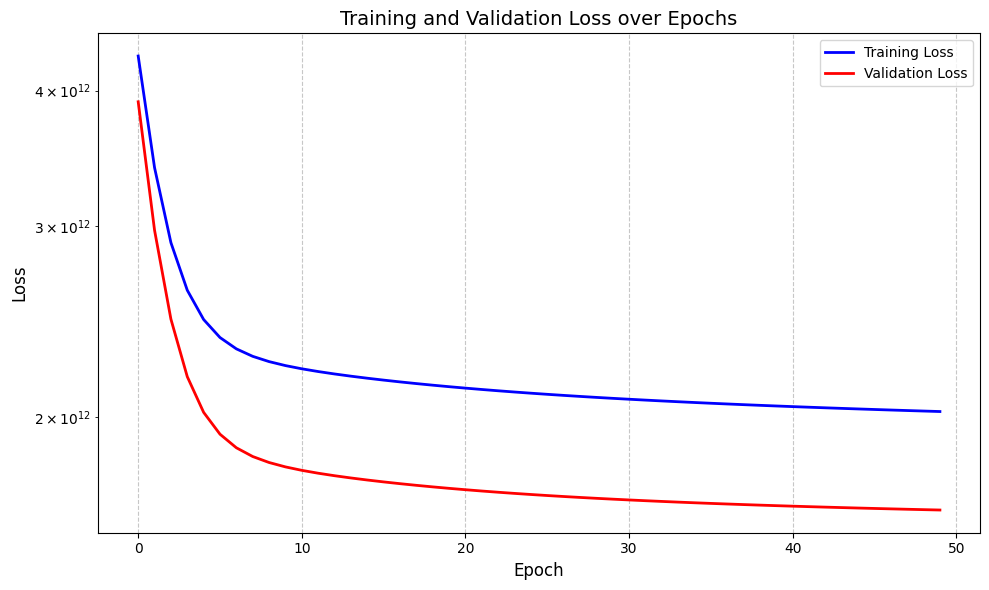

In [155]:
multiLR = MultiLinearRegression(X_train_pca_bias, y_train, X_val_pca_bias, y_val)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
multiLR.plot_losses()

In [156]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_pca_bias)
evaluate_model(y_val_standardized, y_pred)

,Metric,Value
0,Mean Squared Error,4.367261e+12
1,Root Mean Squared Error,2.089799e+06
2,Mean Absolute Error,1.728410e+06
3,R^2 Score,-4.367261e+12


#### VI.3: Polynomial Regression model

#### VI.4: Linear Regression model with PCA